# Phân tích dữ liệu

## Mục tiêu

- Xác định xem `nan-covid-data.csv` có phải là dữ liệu tổng hợp từ các nước thuộc cùng một châu lục hay không
- Trực quan hóa dữ liệu bằng thư viện `matplotlib` và `seaborn`
- Phân tích tình hình dịch ở toàn thế giới nói chung và ở Việt Nam nói riêng

## Các thư viện cần dùng

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
import datetime as dt
import plotly.express as px
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

## So sánh dữ liệu từ `nan-covid-data.csv` và dữ liệu trên từng châu lục

In [2]:
SRC_LINK = Path('./data/')


In [3]:
nan_df = pd.read_csv(SRC_LINK / 'nan-covid-data.csv', parse_dates=['date'])
nan_df.head()

,iso_code,continent,location,date,total_cases,new_cases
0,OWID_AFR,NaN,Africa,2020-02-13,NaN,0.0
1,OWID_AFR,NaN,Africa,2020-02-14,1.0,1.0
2,OWID_AFR,NaN,Africa,2020-02-15,1.0,0.0
3,OWID_AFR,NaN,Africa,2020-02-16,1.0,0.0
4,OWID_AFR,NaN,Africa,2020-02-17,1.0,0.0


In [4]:
def check_validate(filename: str, nan_df, location: str):
    df = pd.read_csv(SRC_LINK / filename, parse_dates=['date'])
    query_by_location = nan_df.query(f"location == '{location}'")
    cols = ['date', 'total_cases', 'new_cases']
    check_df, check_from_nan_df = df[cols], query_by_location[cols]
    groups = check_df.groupby('date', as_index=False).sum()
    check = groups.set_index('date').resample('D').sum()
    min_date = check_from_nan_df['date'].dt.date.min()
    check = check[check.index >= str(min_date)]
    check_from_nan_df.set_index('date', inplace=True)
    check_from_nan_df = check_from_nan_df.resample('D').sum()
    check_from_nan_df = check_from_nan_df[check_from_nan_df.index >= str(min_date)]
    return check.equals(check_from_nan_df), check, check_from_nan_df

In [5]:
set_of_continent = [
    ('africa-data.csv', 'Africa'),
    ('asia-data.csv', 'Asia'),
    ('europe-data.csv', 'Europe'),
    ('north-america-data.csv', 'North America'),
    ('oceania-data.csv', 'Oceania'),
    ('south-america-data.csv', 'South America')
]

In [6]:
for filename, name in set_of_continent:
    print(check_validate(filename, nan_df, name)[0])

True
True
True
True
False
True


Có một tập dữ liệu trả ra là False, vậy chúng ta cần kiểm tra dữ liệu đó để hiểu tại sao lại vậy

In [7]:
valid, df1, df2= check_validate(set_of_continent[4][0], nan_df, set_of_continent[4][1])
valid

False

In [8]:
df1.head()

,total_cases,new_cases
date,,
2020-01-26,4.0,4.0
2020-01-27,5.0,1.0
2020-01-28,5.0,0.0
2020-01-29,6.0,1.0
2020-01-30,9.0,3.0


In [9]:
df2.head()

,total_cases,new_cases
date,,
2020-01-25,0.0,0.0
2020-01-26,4.0,4.0
2020-01-27,5.0,1.0
2020-01-28,5.0,0.0
2020-01-29,6.0,1.0


Lý do ở đây có lẽ là vì ngày bắt đầu là từ ngày `25-01-2020` vậy chúng ta thử drop nó đi và so sánh lại

In [10]:
df2 = df2.iloc[1:, :]
df2

,total_cases,new_cases
date,,
2020-01-26,4.0,4.0
2020-01-27,5.0,1.0
2020-01-28,5.0,0.0
2020-01-29,6.0,1.0
2020-01-30,9.0,3.0
...,...,...
2022-03-01,3642267.0,47727.0
2022-03-02,3706274.0,64007.0
2022-03-03,3755862.0,49588.0


In [11]:
df2.equals(df1)

True

Kết quả trả ra là `True` nên kết luận rằng tập `nan-covid-data.csv` là tổng hợp của các tệp dữ liệu nhỏ hơn mà ta chia ra từ bước 1

## Trực quan hóa dữ liệu

## Trên từng châu lục

In [12]:
# Lấy kết quả ngày cuối cùng
africa_data = pd.read_csv('./data/africa-data.csv')
africa_data['date'] = pd.to_datetime(africa_data['date'])
africa_data = africa_data[africa_data.date == '2022-03-05']
fig = px.choropleth(
    africa_data,
    color='total_cases',
    locations='location',
    locationmode='country names',
    hover_name="location",
    color_continuous_scale=px.colors.sequential.Jet
)
fig.update_layout(
    title={
        'text': "Tổng số ca với từng nước ở Africa",
        'y': 0.9,
        'x': 0.15,
        'xanchor': 'center',
        'yanchor': 'top', })
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0},
                  title=dict(
                      font=dict(size=22)
                  ))
fig.show()

In [13]:
# Lấy kết quả ngày cuối cùng
asia_data = pd.read_csv('./data/asia-data.csv')
asia_data['date'] = pd.to_datetime(asia_data['date'])
asia_data = asia_data[asia_data.date == '2022-03-05']
fig = px.choropleth(
    asia_data,
    color='total_cases',
    locations='location',
    locationmode='country names',
    hover_name="location",
    color_continuous_scale=px.colors.sequential.Jet
)
fig.update_layout(
    title={
        'text': "Tổng số ca với từng nước ở Asia",
        'y': 0.3,
        'x': 0.15,
        'xanchor': 'center',
        'yanchor': 'top', })
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0},
                  title=dict(
                      font=dict(size=22)
                  ))
fig.show()

In [14]:
# Lấy kết quả ngày cuối cùng
euro_data = pd.read_csv('./data/europe-data.csv')
euro_data['date'] = pd.to_datetime(euro_data['date'])
euro_data = euro_data[euro_data.date == '2022-03-05']
fig = px.choropleth(
    euro_data,
    color='total_cases',
    locations='location',
    locationmode='country names',
    hover_name="location",
    color_continuous_scale=px.colors.sequential.Jet
)
fig.update_layout(
    title={
        'text': "Tổng số ca với từng nước ở Euro",
        'y': 0.3,
        'x': 0.15,
        'xanchor': 'center',
        'yanchor': 'top', })
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(
    margin={"r": 0, "t": 0, "l": 0, "b": 0},
    title=dict(
        font=dict(size=22)
    ))
fig.show()

In [15]:
# Lấy kết quả ngày cuối cùng
north_america_data = pd.read_csv('./data/north-america-data.csv')
north_america_data['date'] = pd.to_datetime(north_america_data['date'])
north_america_data = north_america_data[north_america_data.date == '2022-03-05']
fig = px.choropleth(
    north_america_data,
    color='total_cases',
    locations='location',
    locationmode='country names',
    hover_name="location",
    color_continuous_scale=px.colors.sequential.Jet
)
fig.update_layout(
    title={
        'text': "Tổng số ca với từng nước ở North America",
        'y': 0.3,
        'x': 0.7,
        'xanchor': 'center',
        'yanchor': 'top', })
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(
    margin={"r": 0, "t": 0, "l": 0, "b": 0},
    title=dict(
        font=dict(size=22)
    ))
fig.show()

In [16]:
# Lấy kết quả ngày cuối cùng
oceania_data = pd.read_csv('./data/oceania-data.csv')
oceania_data['date'] = pd.to_datetime(oceania_data['date'])
oceania_data = oceania_data[oceania_data.date == '2022-03-05']
fig = px.choropleth(
    oceania_data,
    color='total_cases',
    locations='location',
    locationmode='country names',
    hover_name="location",
    color_continuous_scale=px.colors.sequential.Jet
)
fig.update_layout(
    title={
        'text': "Tổng số ca với từng nước ở Oceania",
        'y': 0.3,
        'x': 0.7,
        'xanchor': 'center',
        'yanchor': 'top', })
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(
    margin={"r": 0, "t": 0, "l": 0, "b": 0},
    title=dict(
        font=dict(size=22)
    ))
fig.show()

In [17]:
# Lấy kết quả ngày cuối cùng
south_america_data = pd.read_csv('./data/south-america-data.csv')
south_america_data['date'] = pd.to_datetime(south_america_data['date'])
south_america_data = south_america_data[south_america_data.date == '2022-03-05']
fig = px.choropleth(
    south_america_data,
    color='total_cases',
    locations='location',
    locationmode='country names',
    hover_name="location",
    color_continuous_scale=px.colors.sequential.Jet
)
fig.update_layout(
    title={
        'text': "Tổng số ca với từng nước ở South America",
        'y': 0.3,
        'x': 0.7,
        'xanchor': 'center',
        'yanchor': 'top', })
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(
    margin={"r": 0, "t": 0, "l": 0, "b": 0},
    title=dict(
        font=dict(size=22)
    ))
fig.show()

Từ bước phía trên, chúng ta đã nhận định được rằng dữ liệu từ tập `nan-covid-data.csv` là tổng hợp của các dữ liệu của các tập bé hơn. Giờ chúng ta sẽ bắt đầu trực quan dữ liệu sử dụng thư viện `matplotlib` và `seaborn` để có góc nhìn "tường minh" hơn về dữ liệu

In [18]:
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (20,10)


In [19]:
def preprocessing_dataframe(df):
    cols = ['location', 'date', 'total_cases', 'new_cases']
    df = df[cols]
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    return df

In [20]:
keys = [
    ('africa', 'Africa'),
    ('asia', 'Asia'),
    ('europe', 'Europe'),
    ('north_america', 'North America'),
    ('oceania', 'Oceania'),
    ('south_america', 'South America')
]
data_dict = {}

for key, name in keys:
    query_by_location = nan_df.query(f"location == '{name}'")
    data_dict[key] = query_by_location

In [21]:
for key in data_dict:
    data_dict[key] = preprocessing_dataframe(data_dict[key])

In [22]:
data_dict['africa'].head()

,location,total_cases,new_cases
date,,,
2020-02-13,Africa,NaN,0.0
2020-02-14,Africa,1.0,1.0
2020-02-15,Africa,1.0,0.0
2020-02-16,Africa,1.0,0.0
2020-02-17,Africa,1.0,0.0


In [23]:
data_dict['asia'].head()

,location,total_cases,new_cases
date,,,
2020-01-22,Asia,556.0,0.0
2020-01-23,Asia,654.0,98.0
2020-01-24,Asia,937.0,283.0
2020-01-25,Asia,1429.0,492.0
2020-01-26,Asia,2105.0,676.0


In [24]:
for key in data_dict:
    print(min(data_dict[key].index))

2020-02-13 00:00:00
2020-01-22 00:00:00
2020-01-23 00:00:00
2020-01-22 00:00:00
2020-01-25 00:00:00
2020-02-22 00:00:00


### So sánh tổng số ca nhiễm

#### Tổng số ca nhiễm **Covid-19** theo từng châu lục (bar chart)

In [25]:
total_cases = []
countries = [k.replace('_', ' ').title() for k in data_dict]
for key in data_dict:
    total_cases.append(
        data_dict[key]['total_cases'].iloc[-1]/1e7
    )

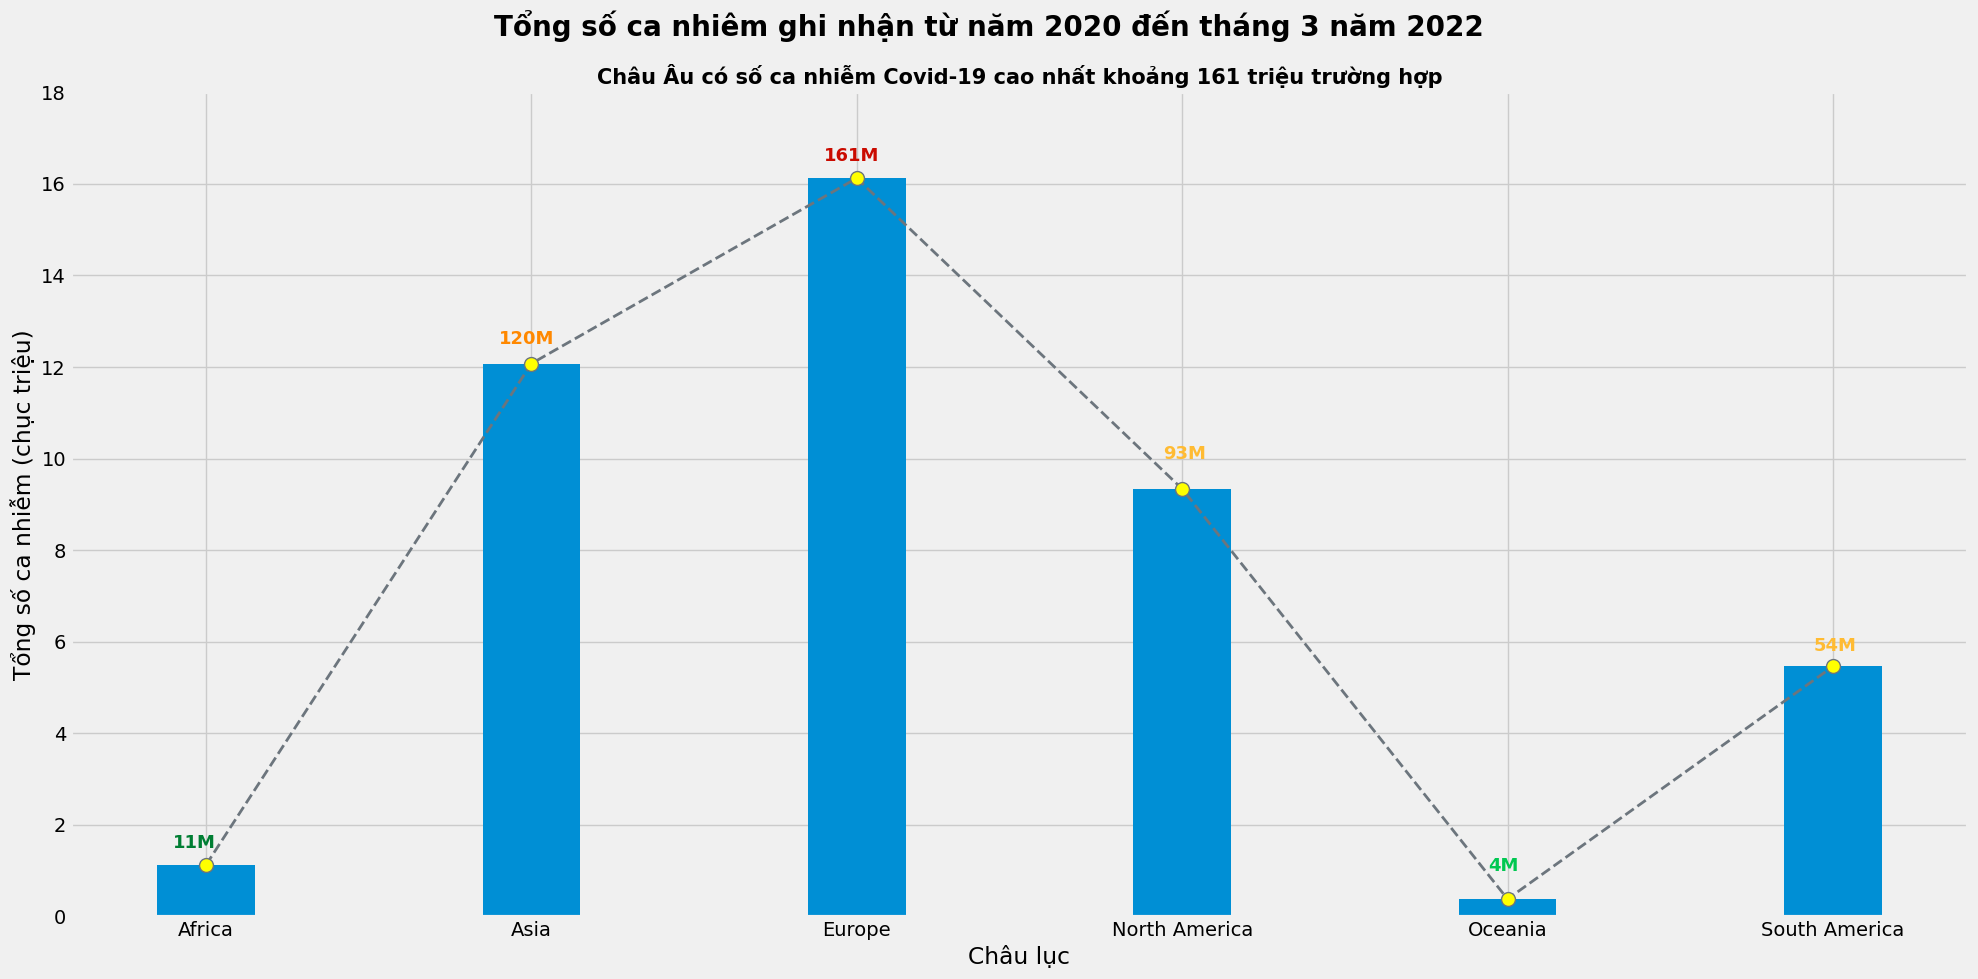

In [26]:
plt.bar(countries, total_cases, width=0.3)
plt.plot(countries, total_cases, marker='o', linestyle='--', color='#6c757d', ms=10, linewidth=2, mfc='yellow')
plt.suptitle("Tổng số ca nhiêm ghi nhận từ năm 2020 đến tháng 3 năm 2022", fontsize=20, weight='bold')
plt.title("Châu Âu có số ca nhiễm Covid-19 cao nhất khoảng 161 triệu trường hợp", fontsize=15, weight='bold')
plt.ylabel("Tổng số ca nhiễm (chục triệu)")
plt.xlabel("Châu lục")
plt.ylim(0, 18)
plt.text(-.1, 1.5, f"11M", fontsize=13, color='#007E33', weight='bold')
plt.text(1-.1, 12.5, f"120M", fontsize=13, color='#FF8800', weight='bold')
plt.text(2-.1, 16.5, f"161M", fontsize=13, color='#CA0B00', weight='bold')
plt.text(3-.06, 10, f"93M", fontsize=13, color='#ffbb33', weight='bold')
plt.text(4-.06, 1, f"4M", fontsize=13, color='#00c851', weight='bold')
plt.text(5-.06, 5.8, f"54M", fontsize=13, color='#ffbb33', weight='bold')

plt.tight_layout()
plt.show()

- Từ biểu đồ cột có thể thấy rằng, *Châu Âu* là vùng có tổng số ca nhiễm nhiều nhất tính từ năm 2020 đến tháng 3 năm 2022 khoảng **16.1 triệu** ca nhiễm
- Sau đó là khu vực *Châu Á* khoảng **12 triệu** ca nhiễm và khu vực *Bắc Mỹ* khoảng **9.3 triệu** ca nhiễm
- Hai khu vực chịu ít ảnh hưởng nhất là khu vực *Châu Phi* và *Châu Đại Dương*

Để lý giải cho những số liệu trên biểu đồ (hình 1), nhóm có một vài nhận định sau:
- Dân số ở khu vực *Châu Phi* và *Châu Đại Dương* mật độ dân số thấp hơn các khu vực khác, cụ thể mật độ dân số ở *Châu Phi* là 45-47 người trên mỗi $km^2$ (2022) và mật độ dân số ở *Châu Đại Dương* là 3.6 người trên mỗi $km^2$. Dân số thưa dẫn đến việc lây lan sẽ ít hơn
- Trong đó, dân số ở *Châu Á* là 4.75 tỷ người (2022), *Châu Âu* là 747.2 triệu người và *Châu Mỹ* khoảng 1.1 tỷ người
- Vậy tại sao ởChâu Âu hay Châu Mỹ dân số ít hơn nhưng tổng số ca nhiễm lại nhiều hơn?

#### Tốc độ tăng trưởng của dịch **Covid-19** qua từng châu lục (line chart)

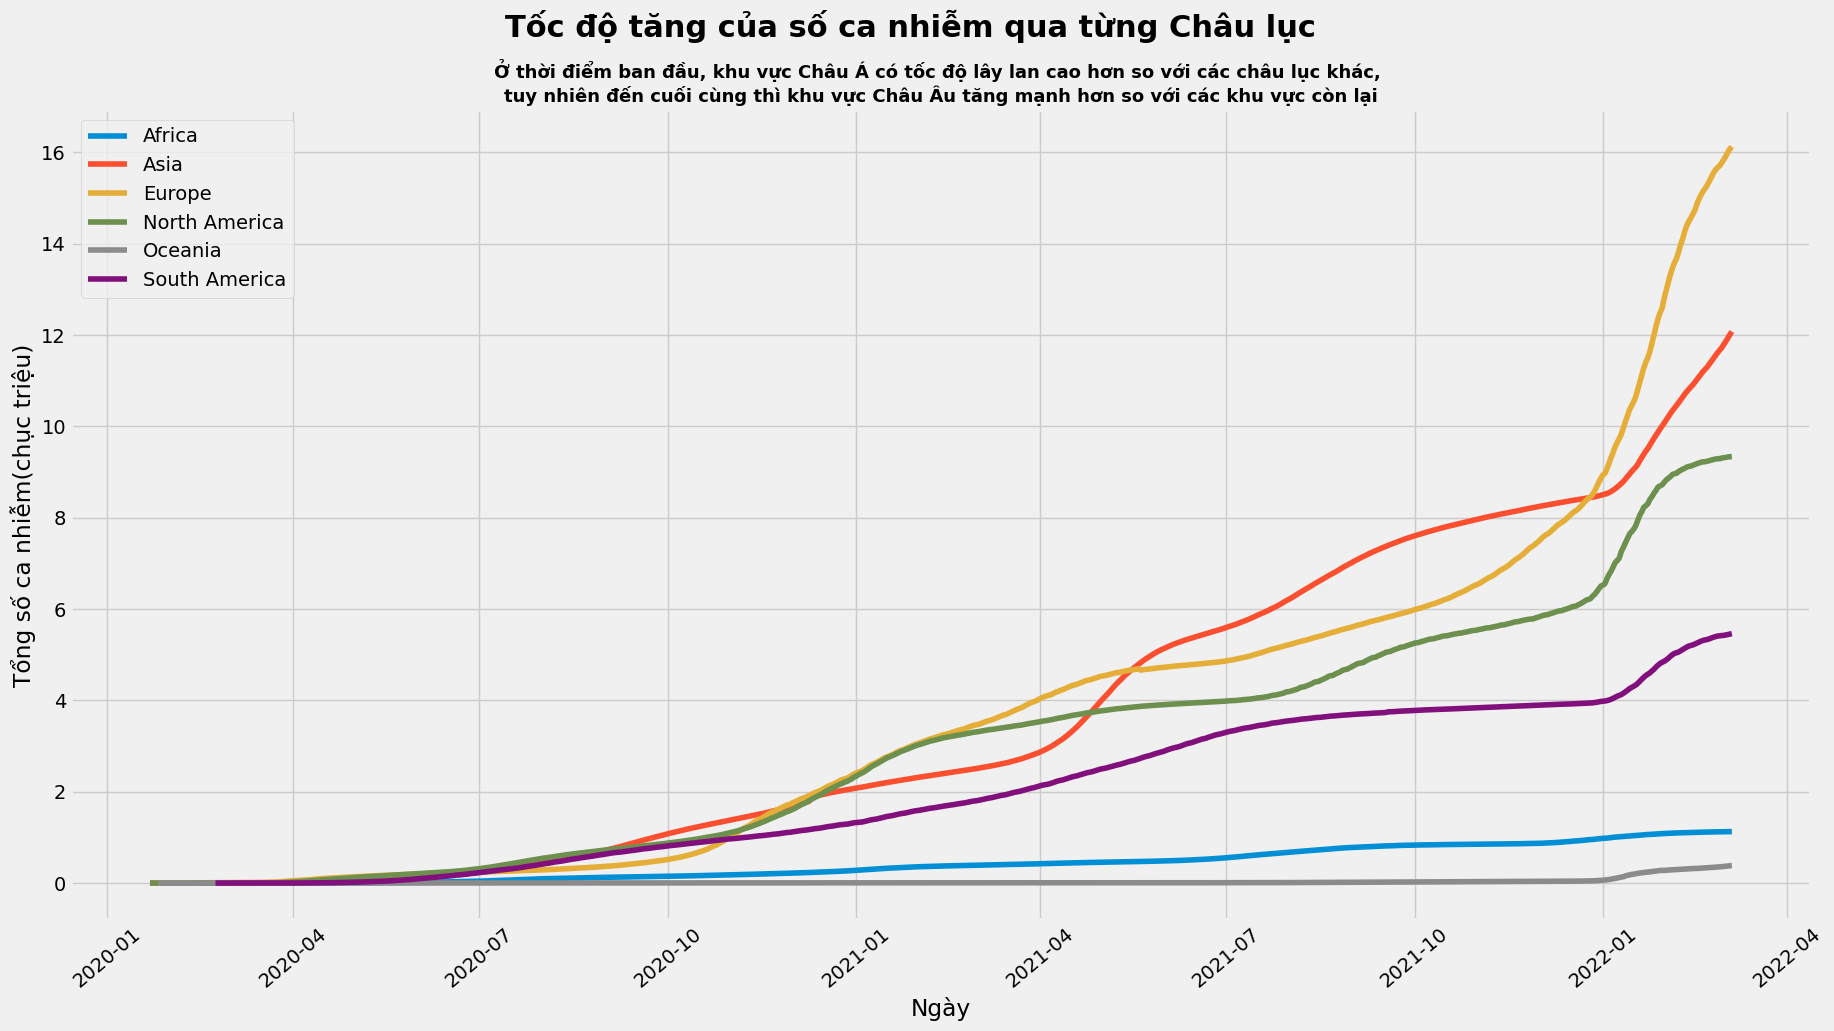

In [27]:
for key in data_dict:
    total_cases = data_dict[key].total_cases / 1e7
    plt.plot(total_cases, label=key.replace('_', ' ').title())
    
plt.xticks(rotation=40)
plt.suptitle("Tốc độ tăng của số ca nhiễm qua từng Châu lục", fontsize=22, weight='bold')
plt.title("Ở thời điểm ban đầu, khu vực Châu Á có tốc độ lây lan cao hơn so với các châu lục khác, \
\ntuy nhiên đến cuối cùng thì khu vực Châu Âu tăng mạnh hơn so với các khu vực còn lại", fontsize=13, weight='bold')
plt.xlabel('Ngày')
plt.ylabel("Tổng số ca nhiễm(chục triệu)")
plt.legend()
plt.show()
    # data_dict['africa'].index

#### Số ca nhiễm mới ghi nhận theo từng ngày

Vì các khu vực Châu Phi và Châu Đại Dương bị ảnh hưởng ít, nên chúng ta sẽ quan tâm đến top 3 khu vực có tổng số ca nhiễm cao nhất

**Châu Á(Asia)**

In [28]:
def plot_newCases(name, idx, linewidth=1.5):
    continent = data_dict[name]
    new_cases = continent['new_cases']
    
    plt.plot(new_cases / 1e5, linewidth=linewidth)
    plt.xlabel("Ngày")
    plt.ylabel("Số ca nhiễm mới (trăm nghìn)")
    plt.suptitle(f"Số ca nhiễm mới ghi nhận theo ngày ở {name.replace('_', ' ').title()}", fontsize=20, weight='bold')
    plt.tight_layout()
    plt.show()

In [29]:
def plot_newCase_with_rollingMean(name, idx, window_size = 7):
    continent = data_dict[name]
    new_cases = continent['new_cases']
    rolling_mean = new_cases.rolling(window=window_size).mean()
    plt.plot(new_cases / 1e5, color='blue', label='Original')
    plt.plot(rolling_mean / 1e5, color='red', label='Rolling Mean')
    plt.xlabel("Ngày")
    plt.ylabel("Số ca nhiễm mới (trăm nghìn)")
    plt.suptitle(f"Rolling mean với window_size = {window_size} in {name.title()}", fontsize=20, weight='bold')
    plt.legend()
    plt.tight_layout()
    plt.show()
    return rolling_mean

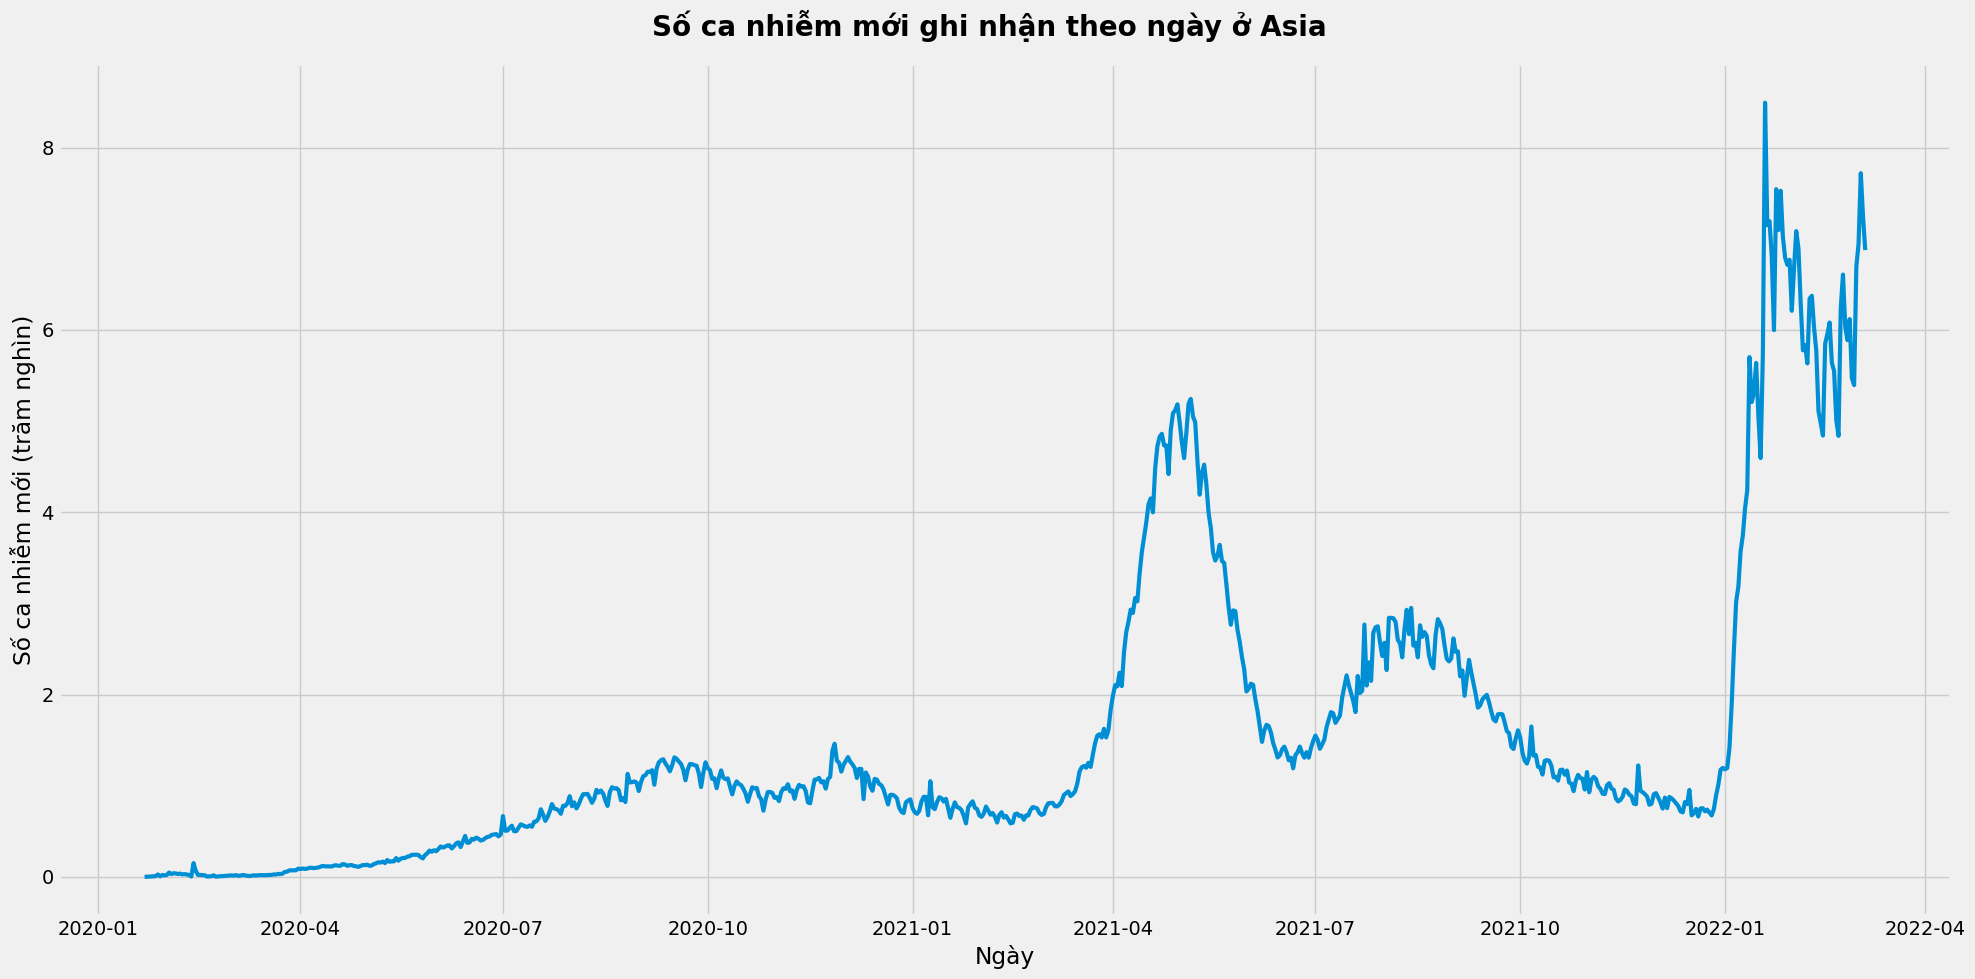

In [30]:
plot_newCases("asia", 3, 3)

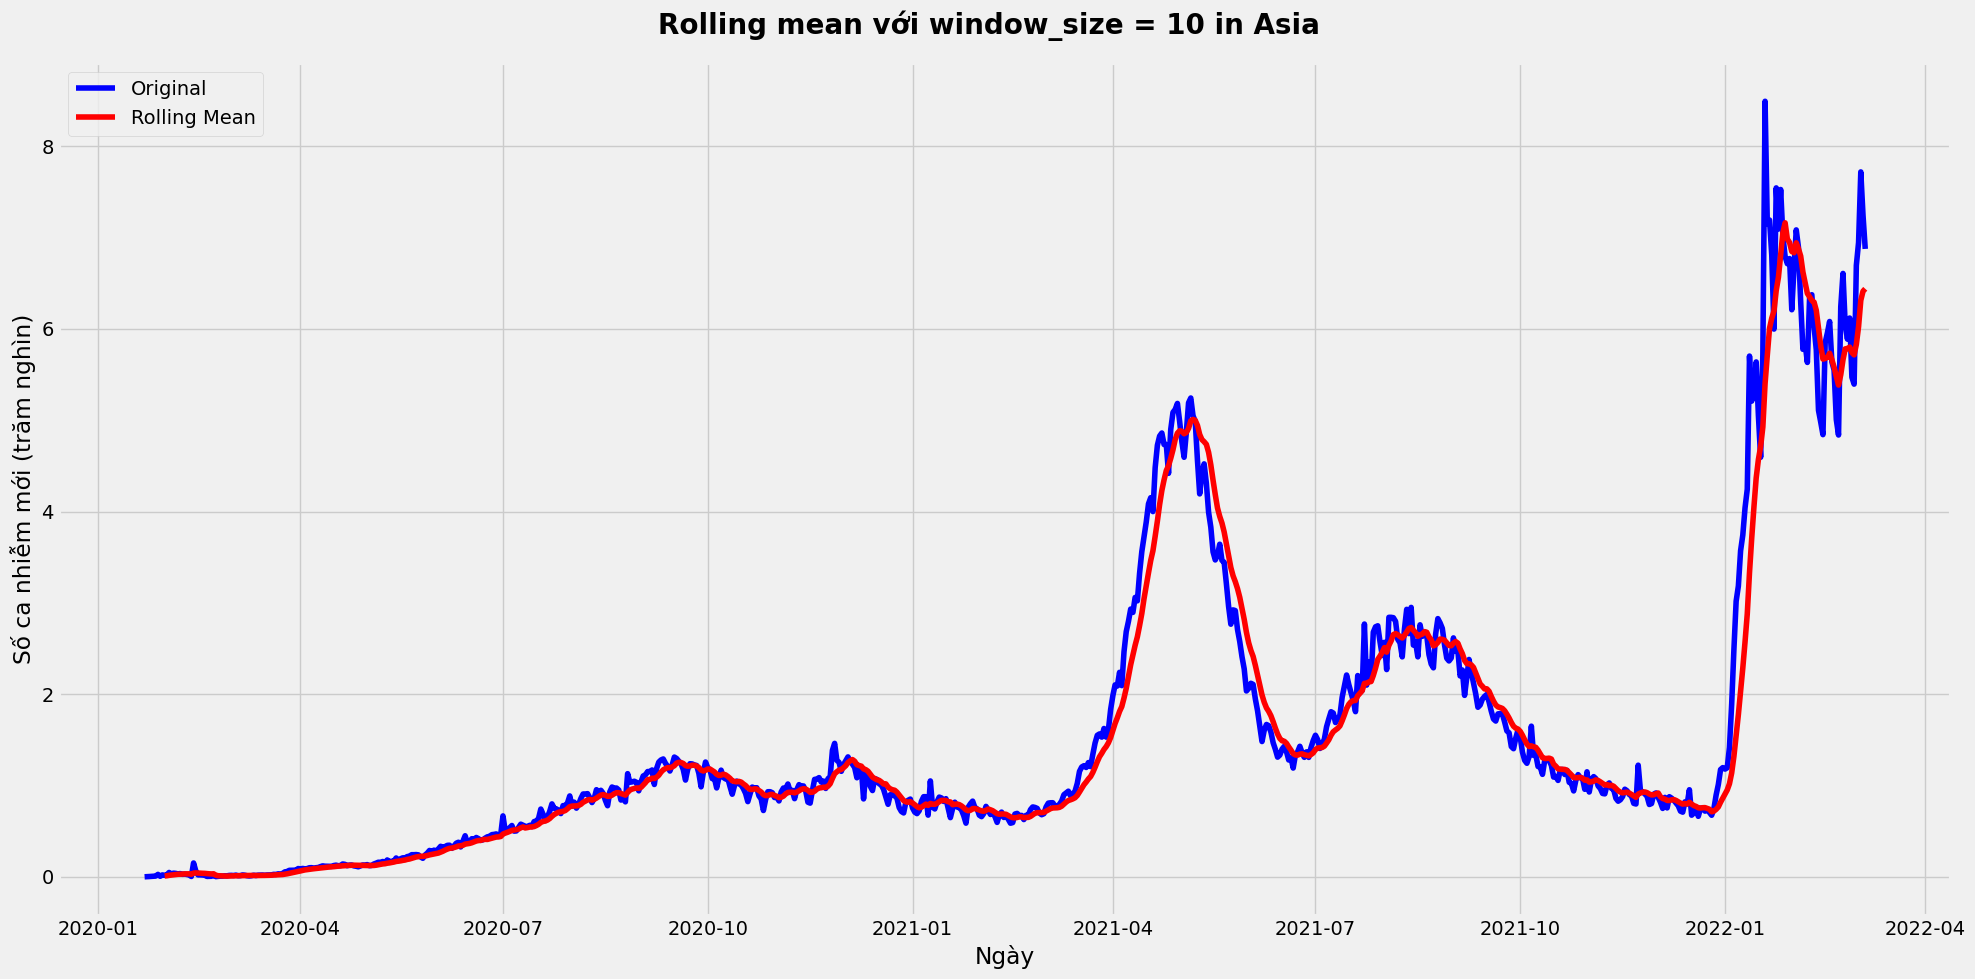

In [31]:
asia_rolling_mean = plot_newCase_with_rollingMean('asia', 4, 10)

**Châu Âu**

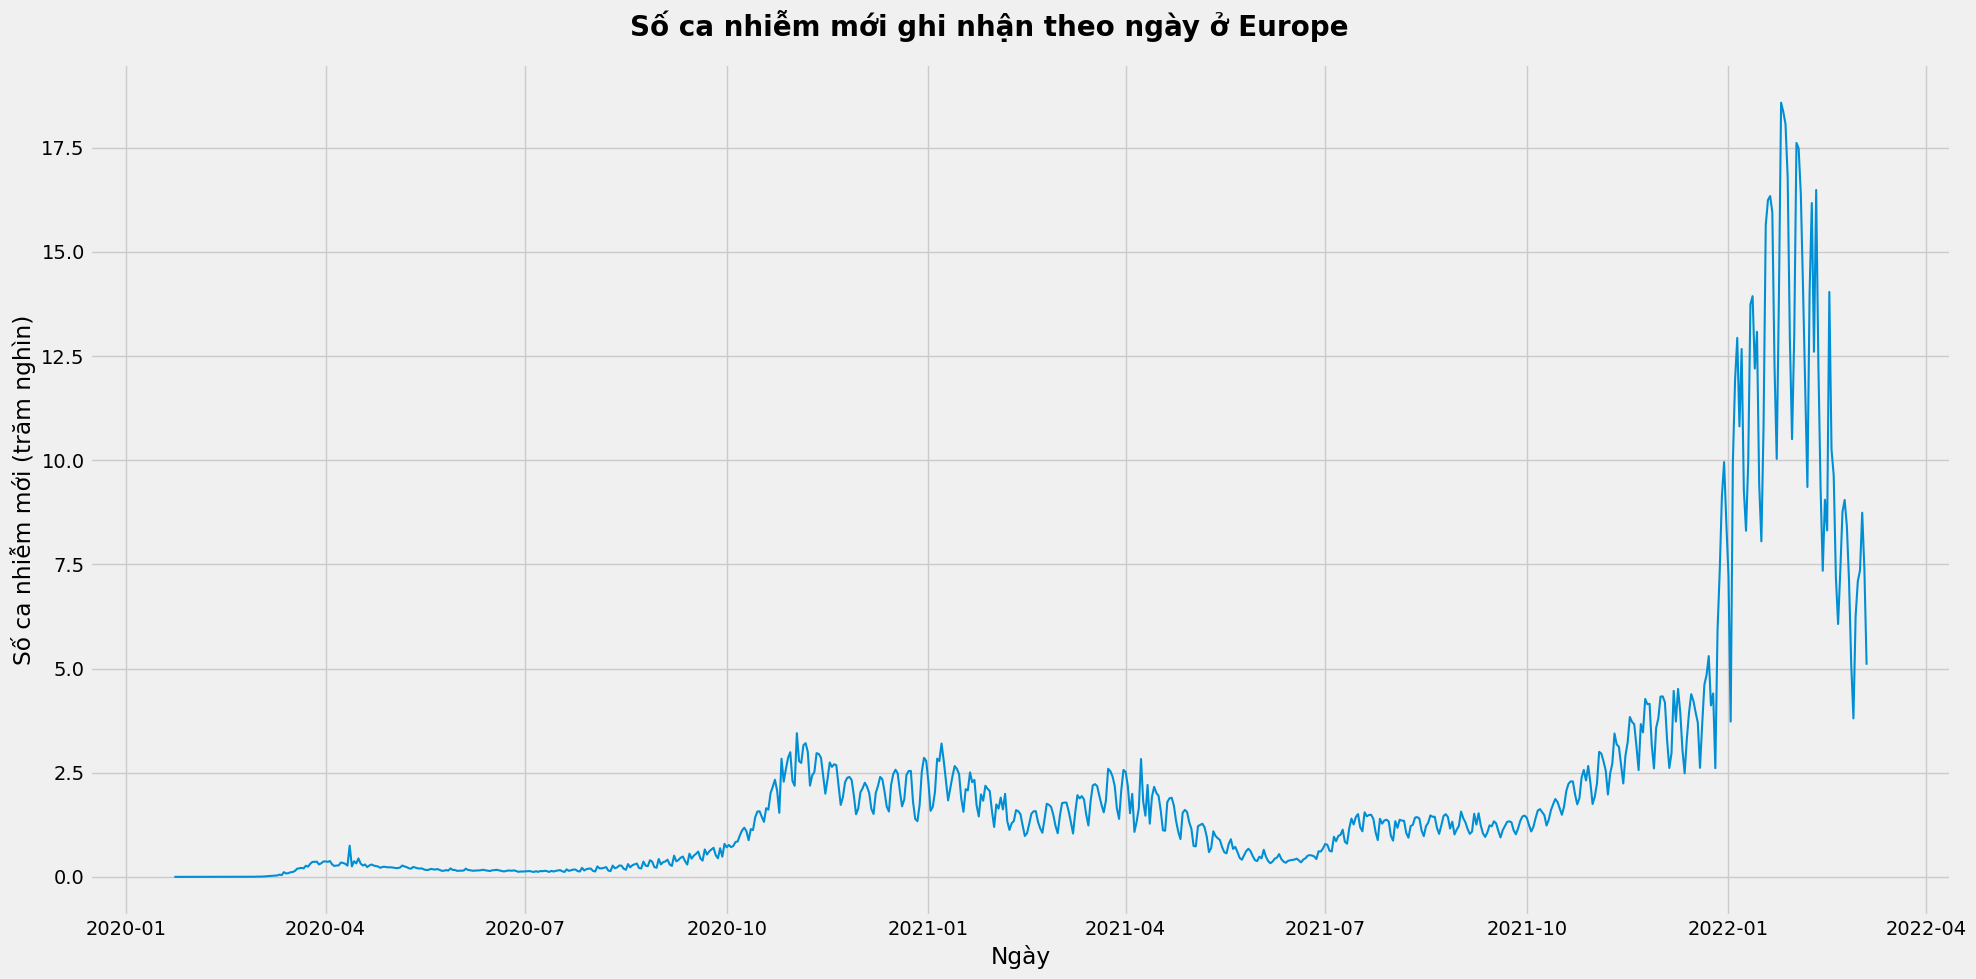

In [32]:
plot_newCases('europe', 5)

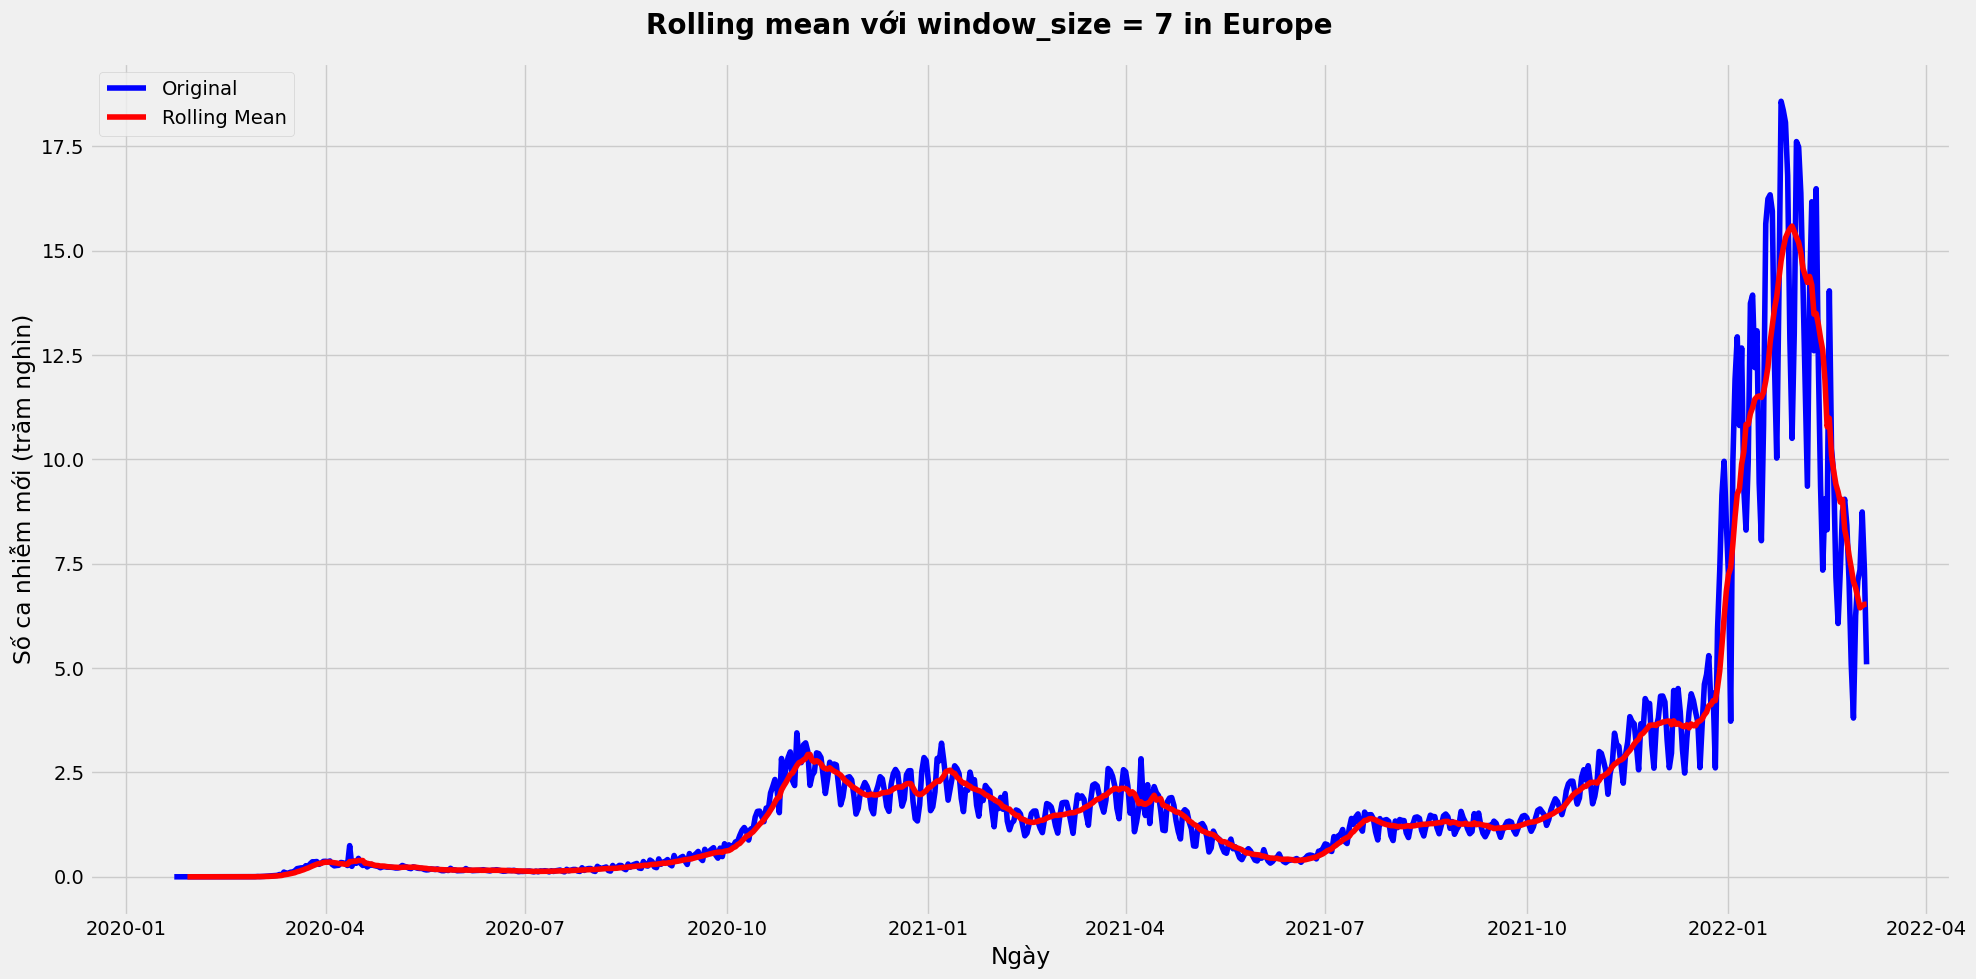

In [33]:
euro_rolling_mean = plot_newCase_with_rollingMean('europe', 6)

**Bắc Mỹ**

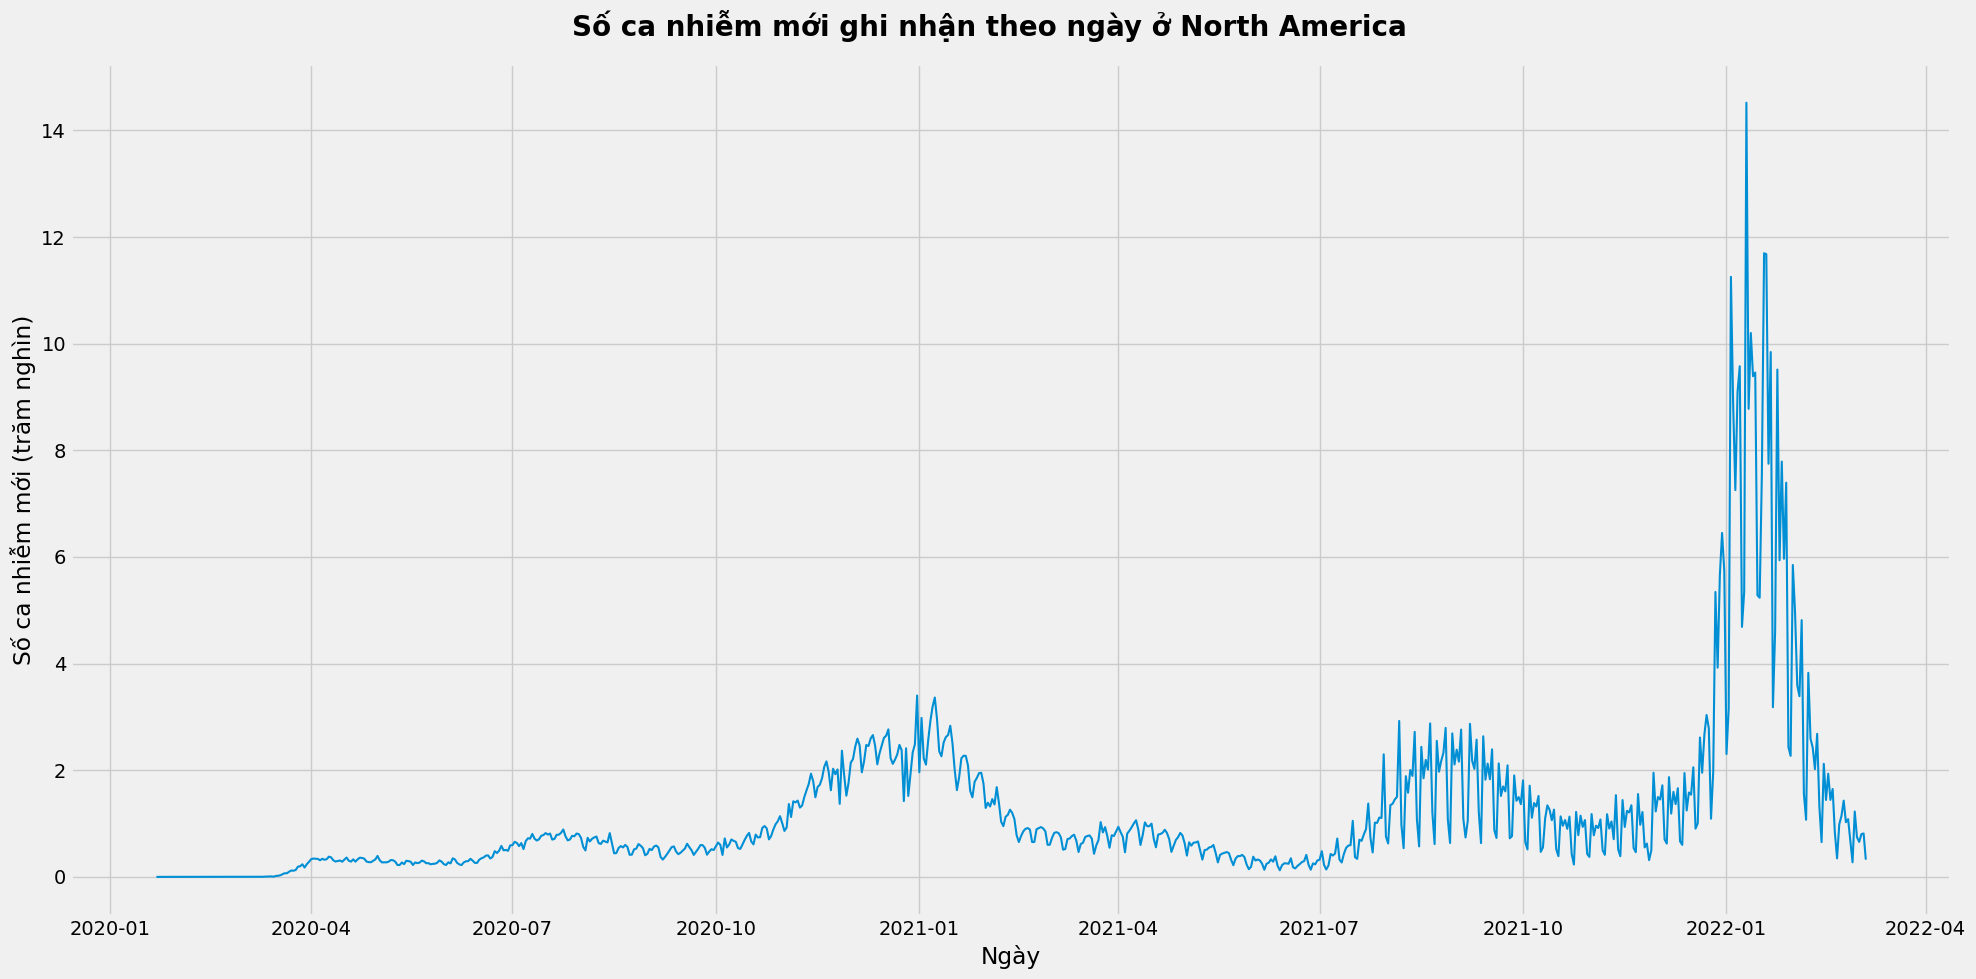

In [34]:
plot_newCases('north_america', 7)

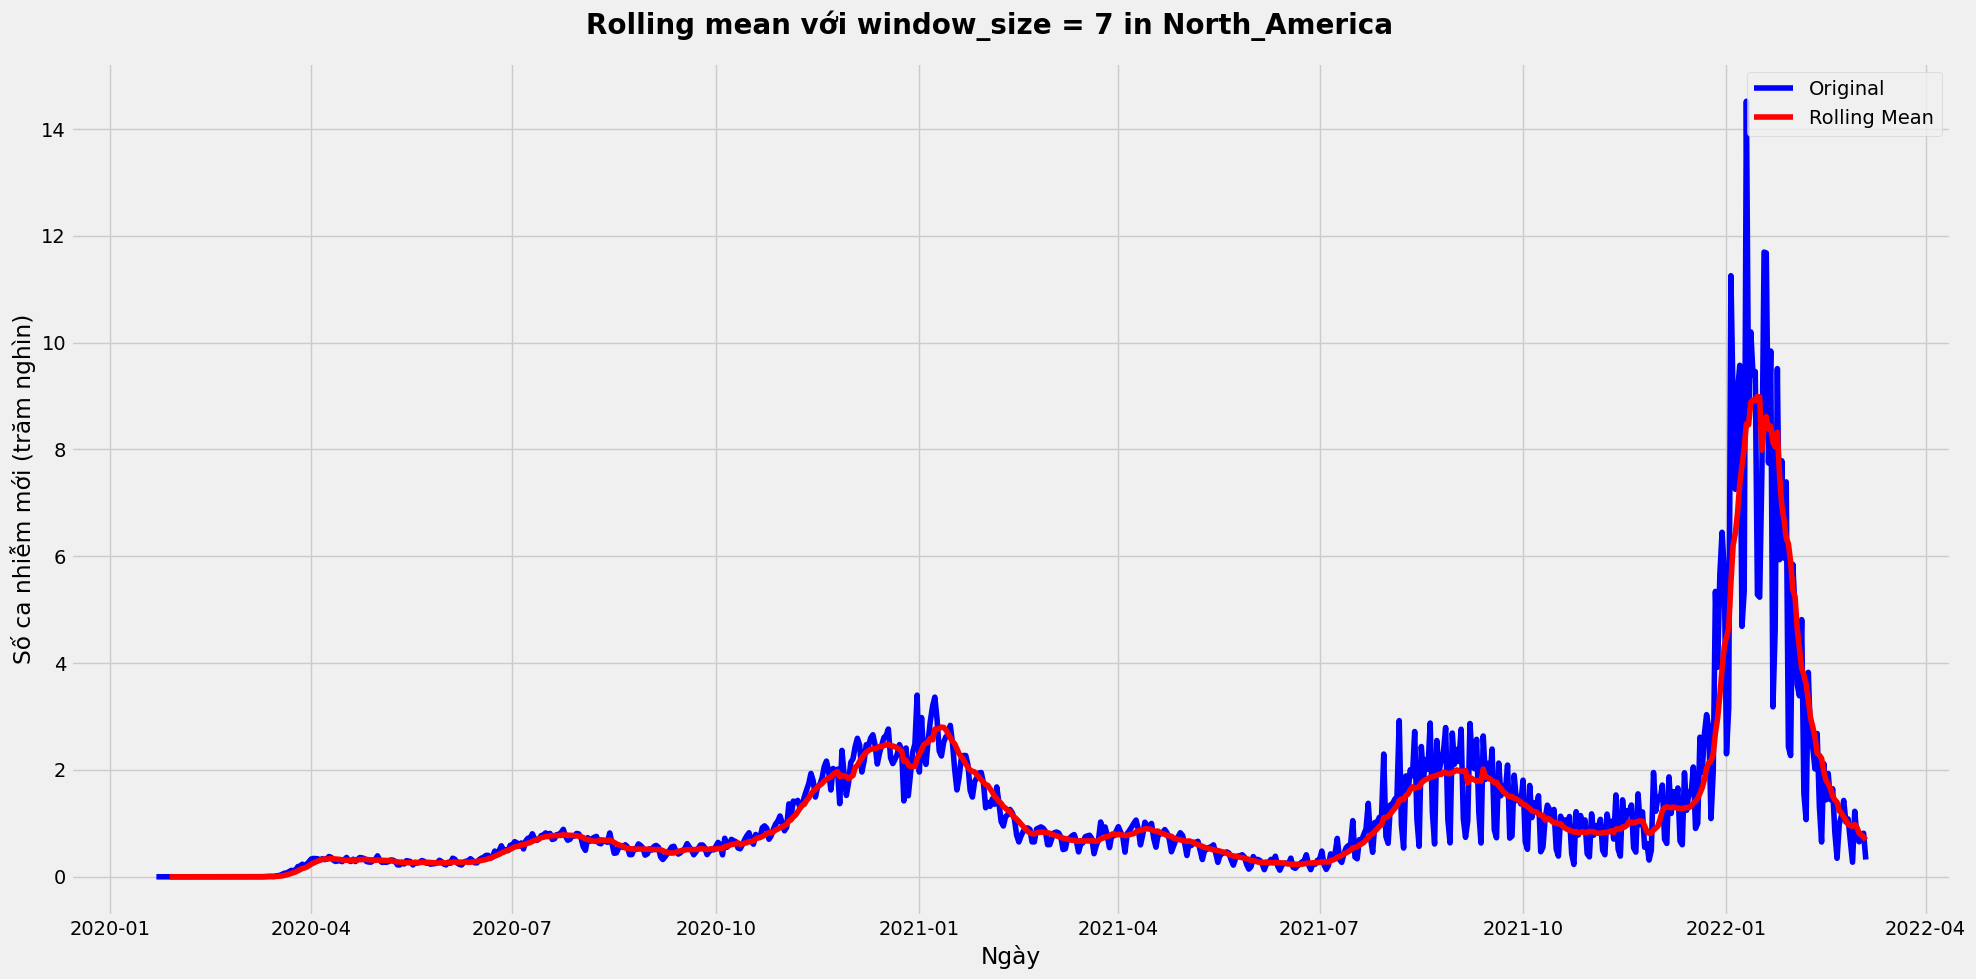

In [35]:
north_america_rolling_mean = plot_newCase_with_rollingMean('north_america', 8)

> Chúng ta vẽ đồ thị dạng đường (`line plot`) của ba khu vực đang xét như hình 3, hình 5 và hình 7, tuy nhiên các giá trị biến thiên liên tục vì vậy chúng ta sử dụng kĩ thuật **Rolling mean** với `window_size=7` (tính trung bình theo 7 ngày trước đó) như hình 4, hình 6 và hình 8. Từ đó cũng nhận ra một điều rằng thời điểm mà cả ba khu vực đều ghi nhận số ca nhiễm nhiều nhất cũng khá gần nhau. Ví dụ ở khu vực `Châu Á` vào ngày 25 tháng 1 năm 2022, ở khu vực `Châu Âu` thì vào ngày 30 tháng 1 và khu vực `Bắc Mỹ` thì vào ngày 15 tháng 1 cùng năm

> Quay lại câu hỏi tại sao khu vực `Châu Âu` và `Bắc Mỹ` ít dân hơn nhưng tốc độ lây lan lại nhanh và ghi nhận số ca nhiễm mới lại rất nhiều. Thì lí do ở đây là các nước `Châu Âu` như (Pháp, Đức, ...) hay `Bắc Mỹ` (Canada, Hoa kỳ, ...) gồm các nước phát triển và thông qua báo đài chúng ta thấy rằng thời điểm căng thẳng của dịch ở những khu vực trọng điểm của các nước đó vẫn rất tấp lập các phương tiện qua lại cũng như là con người. Vì vậy đó cũng là lí do giải thích cho sự lây lan đột biến của các khu vực đó.

## Tình hình dịch ở Việt Nam

> Như đã nêu rõ mục tiêu từ đầu, nhóm em sẽ phân tích chung về các khu vực chịu ảnh hưởng nhiều của dịch Covid-19 như các phần trên và tập trung chủ yếu vào tình hình dịch ở Việt Nam. Nên ở phần này, nhóm sẽ tập trung vào phân tích sự ảnh hưởng của tình hình dịch tại Việt Nam

In [36]:
vn_covid = pd.read_csv(SRC_LINK / 'vietnam-covid-data.csv', parse_dates=['date'])
vn_covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,VNM,Asia,Vietnam,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,308.127,32.6,7.15,4.718,6171.884,2,245.465,6,1,45.9,85.847,2.6,75.4,0.704,98186856,NaN,NaN,NaN,NaN
1,VNM,Asia,Vietnam,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,308.127,32.6,7.15,4.718,6171.884,2,245.465,6,1,45.9,85.847,2.6,75.4,0.704,98186856,NaN,NaN,NaN,NaN
2,VNM,Asia,Vietnam,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,308.127,32.6,7.15,4.718,6171.884,2,245.465,6,1,45.9,85.847,2.6,75.4,0.704,98186856,NaN,NaN,NaN,NaN
3,VNM,Asia,Vietnam,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,308.127,32.6,7.15,4.718,6171.884,2,245.465,6,1,45.9,85.847,2.6,75.4,0.704,98186856,NaN,NaN,NaN,NaN
4,VNM,Asia,Vietnam,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,308.127,32.6,7.15,4.718,6171.884,2,245.465,6,1,45.9,85.847,2.6,75.4,0.704,98186856,NaN,NaN,NaN,NaN


In [37]:
cols = ['location', 'date', 'total_cases', 'new_cases']

vn_covid = vn_covid[cols]

vn_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   location     1217 non-null   object        
 1   date         1217 non-null   datetime64[ns]
 2   total_cases  1195 non-null   float64       
 3   new_cases    1215 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 38.2+ KB


In [38]:
vn_covid.head()

,location,date,total_cases,new_cases
0,Vietnam,2020-01-03,NaN,0.0
1,Vietnam,2020-01-04,NaN,0.0
2,Vietnam,2020-01-05,NaN,0.0
3,Vietnam,2020-01-06,NaN,0.0
4,Vietnam,2020-01-07,NaN,0.0


In [39]:
vn_covid.isnull().sum()

location        0
date            0
total_cases    22
new_cases       2
dtype: int64

In [40]:
# Chúng ta sẽ lấy từ ngày Việt Nam ghi nhận những ca covid đầu tiên
vn_covid = vn_covid.query("date >= '2020-01-25'")

vn_covid.isnull().sum()

location       0
date           0
total_cases    0
new_cases      2
dtype: int64

In [41]:
vn_covid[vn_covid.new_cases.isnull()]

,location,date,total_cases,new_cases
1215,Vietnam,2023-05-02,11561848.0,NaN
1216,Vietnam,2023-05-03,11561848.0,NaN


In [42]:
# Set cột `date` thành cột index
vn_covid.set_index('date', inplace=True)

vn_covid

,location,total_cases,new_cases
date,,,
2020-01-25,Vietnam,2.0,2.0
2020-01-26,Vietnam,2.0,0.0
2020-01-27,Vietnam,2.0,0.0
2020-01-28,Vietnam,2.0,0.0
2020-01-29,Vietnam,2.0,0.0
...,...,...,...
2023-04-29,Vietnam,11557969.0,3094.0
2023-04-30,Vietnam,11559862.0,1893.0
2023-05-01,Vietnam,11561848.0,1986.0


In [43]:
# Chuyển dạng dữ liệu cột `total_cases` thành dạng số nguyên
vn_covid['total_cases'] = vn_covid['total_cases'].astype('int64')

vn_covid.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1195 entries, 2020-01-25 to 2023-05-03
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   location     1195 non-null   object 
 1   total_cases  1195 non-null   int64  
 2   new_cases    1193 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 37.3+ KB


In [44]:
vn_covid.head()

,location,total_cases,new_cases
date,,,
2020-01-25,Vietnam,2,2.0
2020-01-26,Vietnam,2,0.0
2020-01-27,Vietnam,2,0.0
2020-01-28,Vietnam,2,0.0
2020-01-29,Vietnam,2,0.0


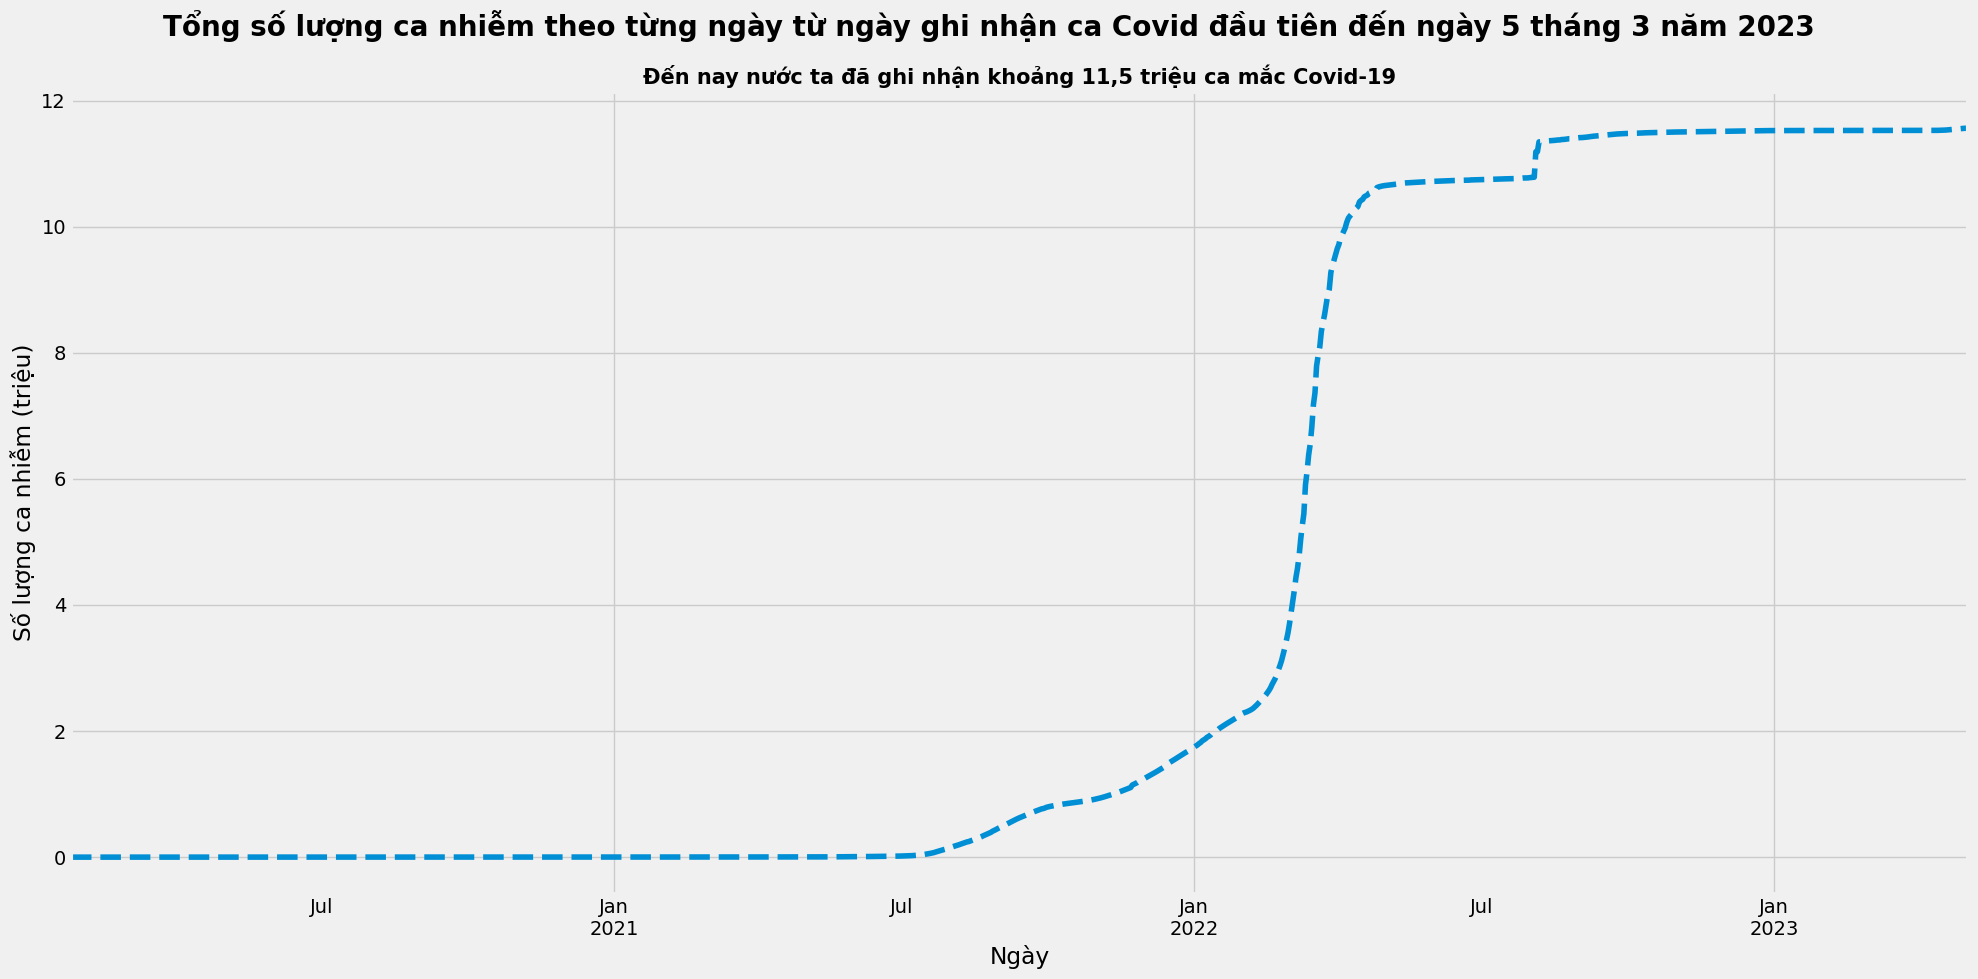

In [45]:
total_cases = vn_covid['total_cases'] / 1e6

total_cases.plot(linestyle='--')
plt.xlabel('Ngày')
plt.ylabel('Số lượng ca nhiễm (triệu)')
plt.suptitle("Tổng số lượng ca nhiễm theo từng ngày từ ngày ghi nhận ca Covid đầu tiên đến ngày 5 tháng 3 năm 2023", fontsize=20, weight='bold')
plt.title("Đến nay nước ta đã ghi nhận khoảng 11,5 triệu ca mắc Covid-19", fontsize=15, weight='bold')
plt.tight_layout()
plt.show()

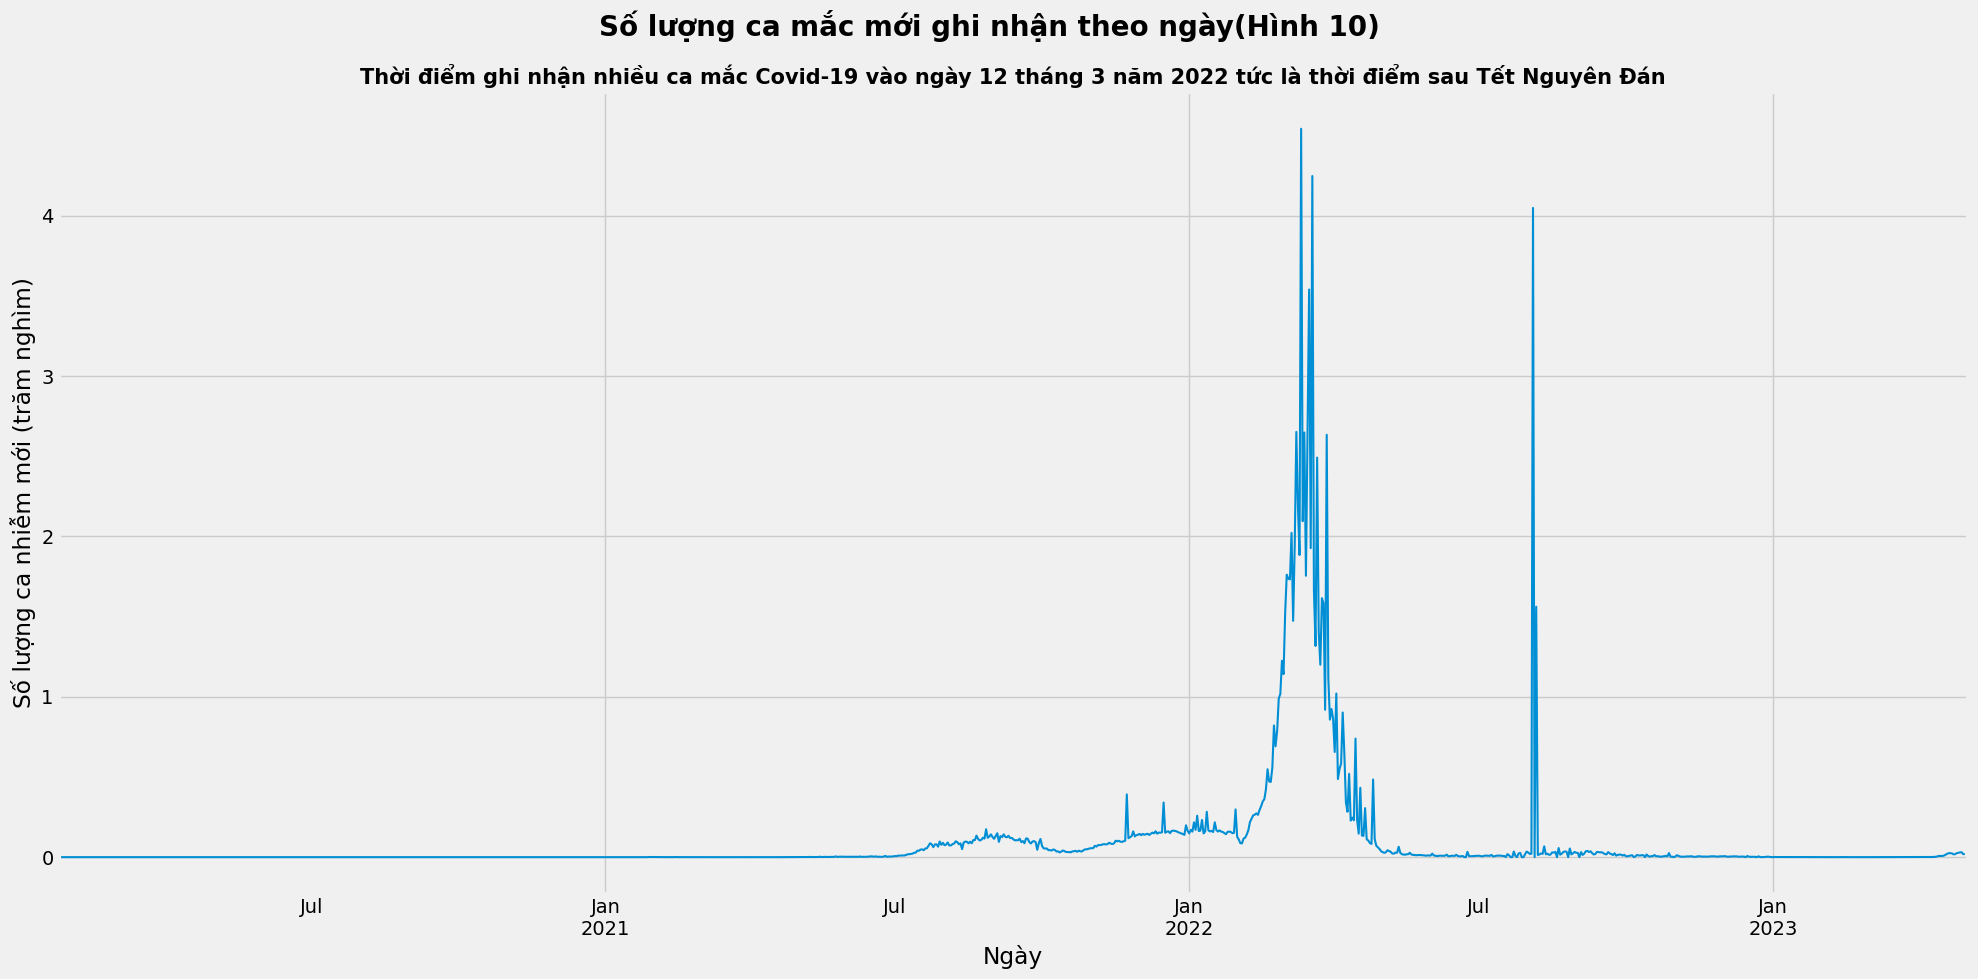

In [46]:
new_cases = vn_covid['new_cases'] / 1e5

new_cases.plot(linewidth=1.5)
plt.xlabel('Ngày')
plt.ylabel('Số lượng ca nhiễm mới (trăm nghìm)')
plt.suptitle("Số lượng ca mắc mới ghi nhận theo ngày(Hình 10)", fontsize=20, weight='bold')
plt.title("Thời điểm ghi nhận nhiều ca mắc Covid-19 vào ngày 12 tháng 3 năm 2022 tức là thời điểm sau Tết Nguyên Đán", fontsize=15, weight='bold')
plt.tight_layout()
plt.show()

- Từ hình 10, chúng ta có thể thấy rằng có hai đời điểm đó là vào **giữa tháng 3** và **đầu tháng 8** năm 2022 trước khi tình hình Covid lắng xuống vào giai đoạn sau
- Để có thể nhìn rõ hơn, chúng ta sử dụng kĩ thuật `rolling mean` với `window_size=7`

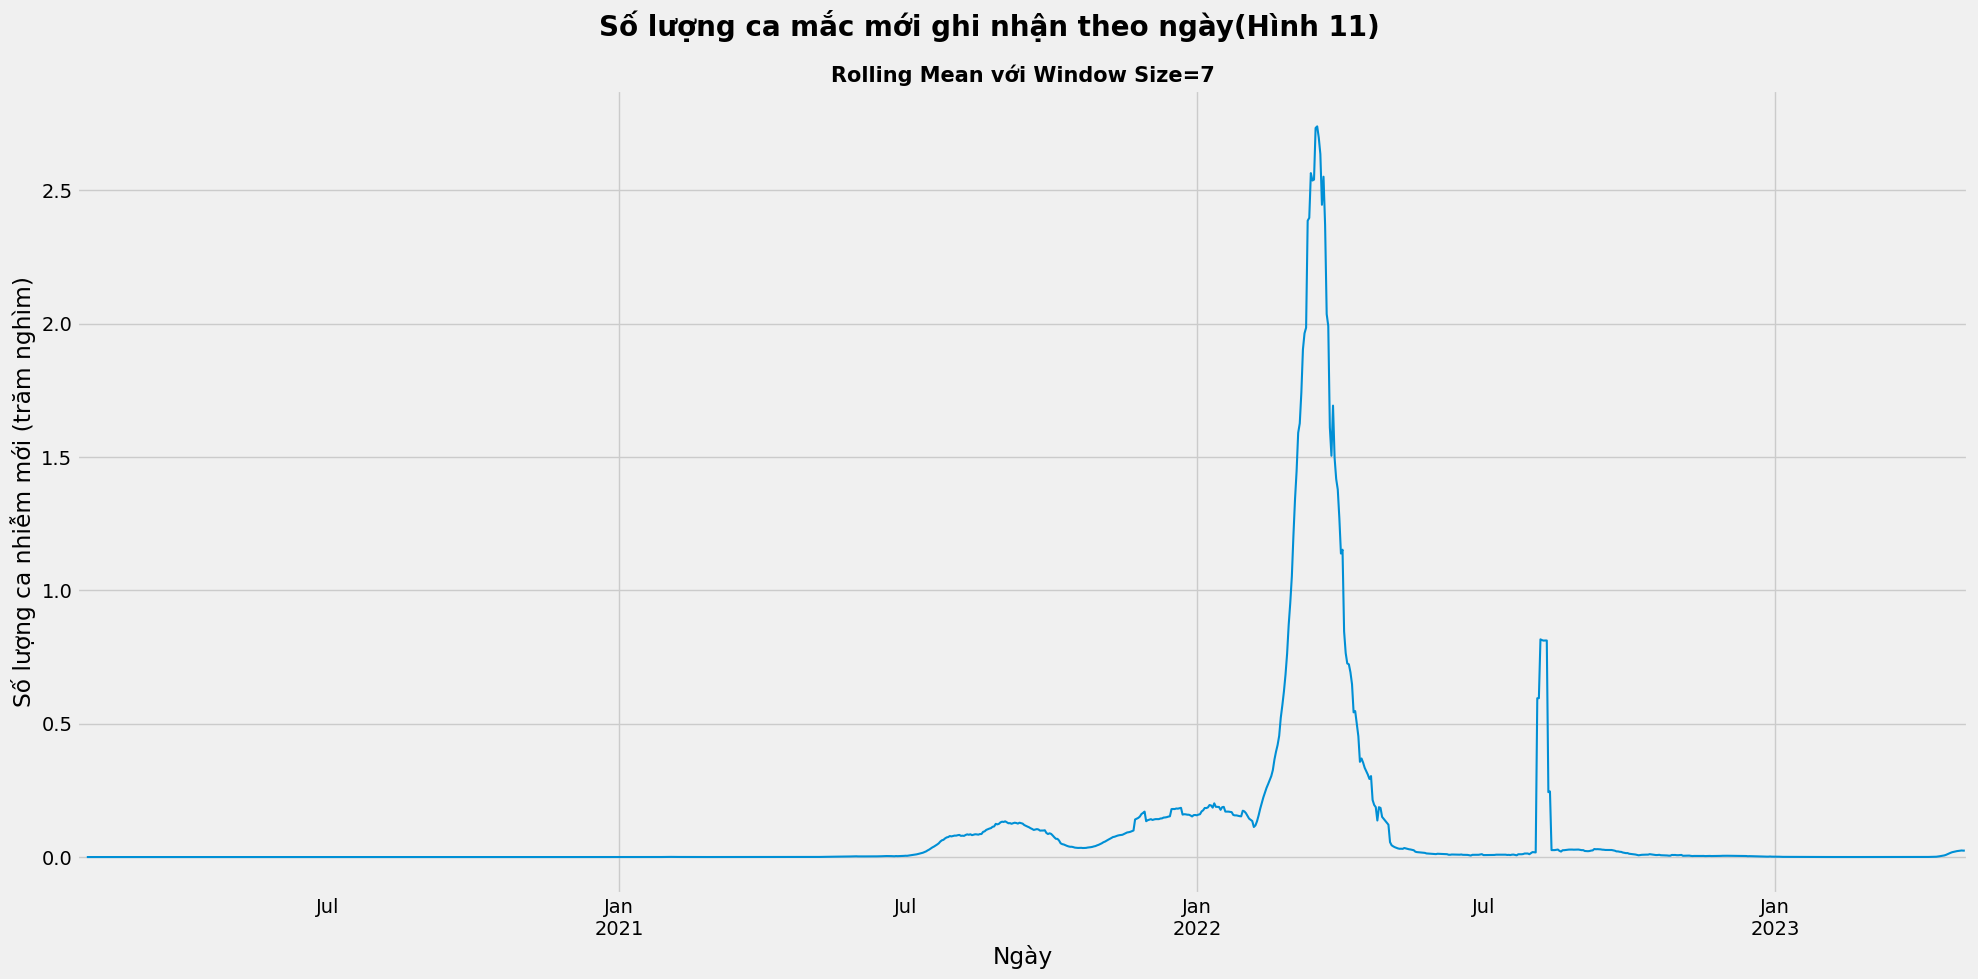

In [47]:
new_cases = new_cases.rolling(window=7).mean()
new_cases.plot(linewidth=1.5)
plt.xlabel('Ngày')
plt.ylabel('Số lượng ca nhiễm mới (trăm nghìm)')
plt.suptitle("Số lượng ca mắc mới ghi nhận theo ngày(Hình 11)", fontsize=20, weight='bold')
plt.title("Rolling Mean với Window Size=7", fontsize=15, weight='bold')
plt.tight_layout()
plt.show()

### Phân tích tình hình dịch qua từng năm

In [48]:
vn_covid_2020 = vn_covid[(vn_covid.index >= '2020-01-01') & (vn_covid.index <= '2020-12-31')]
vn_covid_2021 = vn_covid[(vn_covid.index >= '2021-01-01') & (vn_covid.index <= '2021-12-31')]
vn_covid_2022 = vn_covid[(vn_covid.index >= '2022-01-01') & (vn_covid.index <= '2022-12-31')]
vn_covid_2023 = vn_covid[(vn_covid.index >= '2023-01-01') & (vn_covid.index <= '2023-12-31')]

print(f"Shape of vn_covid_2020: {vn_covid_2020.shape}")
print(f"Shape of vn_covid_2021: {vn_covid_2021.shape}")
print(f"Shape of vn_covid_2022: {vn_covid_2022.shape}")
print(f"Shape of vn_covid_2023: {vn_covid_2023.shape}")

Shape of vn_covid_2020: (342, 3)
Shape of vn_covid_2021: (365, 3)
Shape of vn_covid_2022: (365, 3)
Shape of vn_covid_2023: (123, 3)


#### Năm 2020

#### Nhìn chung, năm 2020 là năm mà nước ta kiểm soát dịch rất tốt, khi mà đến cuối năm tổng số ca nhiễm là 1456 trường hợp

In [49]:
vn_covid_2020.head()

,location,total_cases,new_cases
date,,,
2020-01-25,Vietnam,2,2.0
2020-01-26,Vietnam,2,0.0
2020-01-27,Vietnam,2,0.0
2020-01-28,Vietnam,2,0.0
2020-01-29,Vietnam,2,0.0


In [50]:
vn_covid_2020[vn_covid_2020['new_cases']==50]

,location,total_cases,new_cases
date,,,
2020-07-31,Vietnam,509,50.0


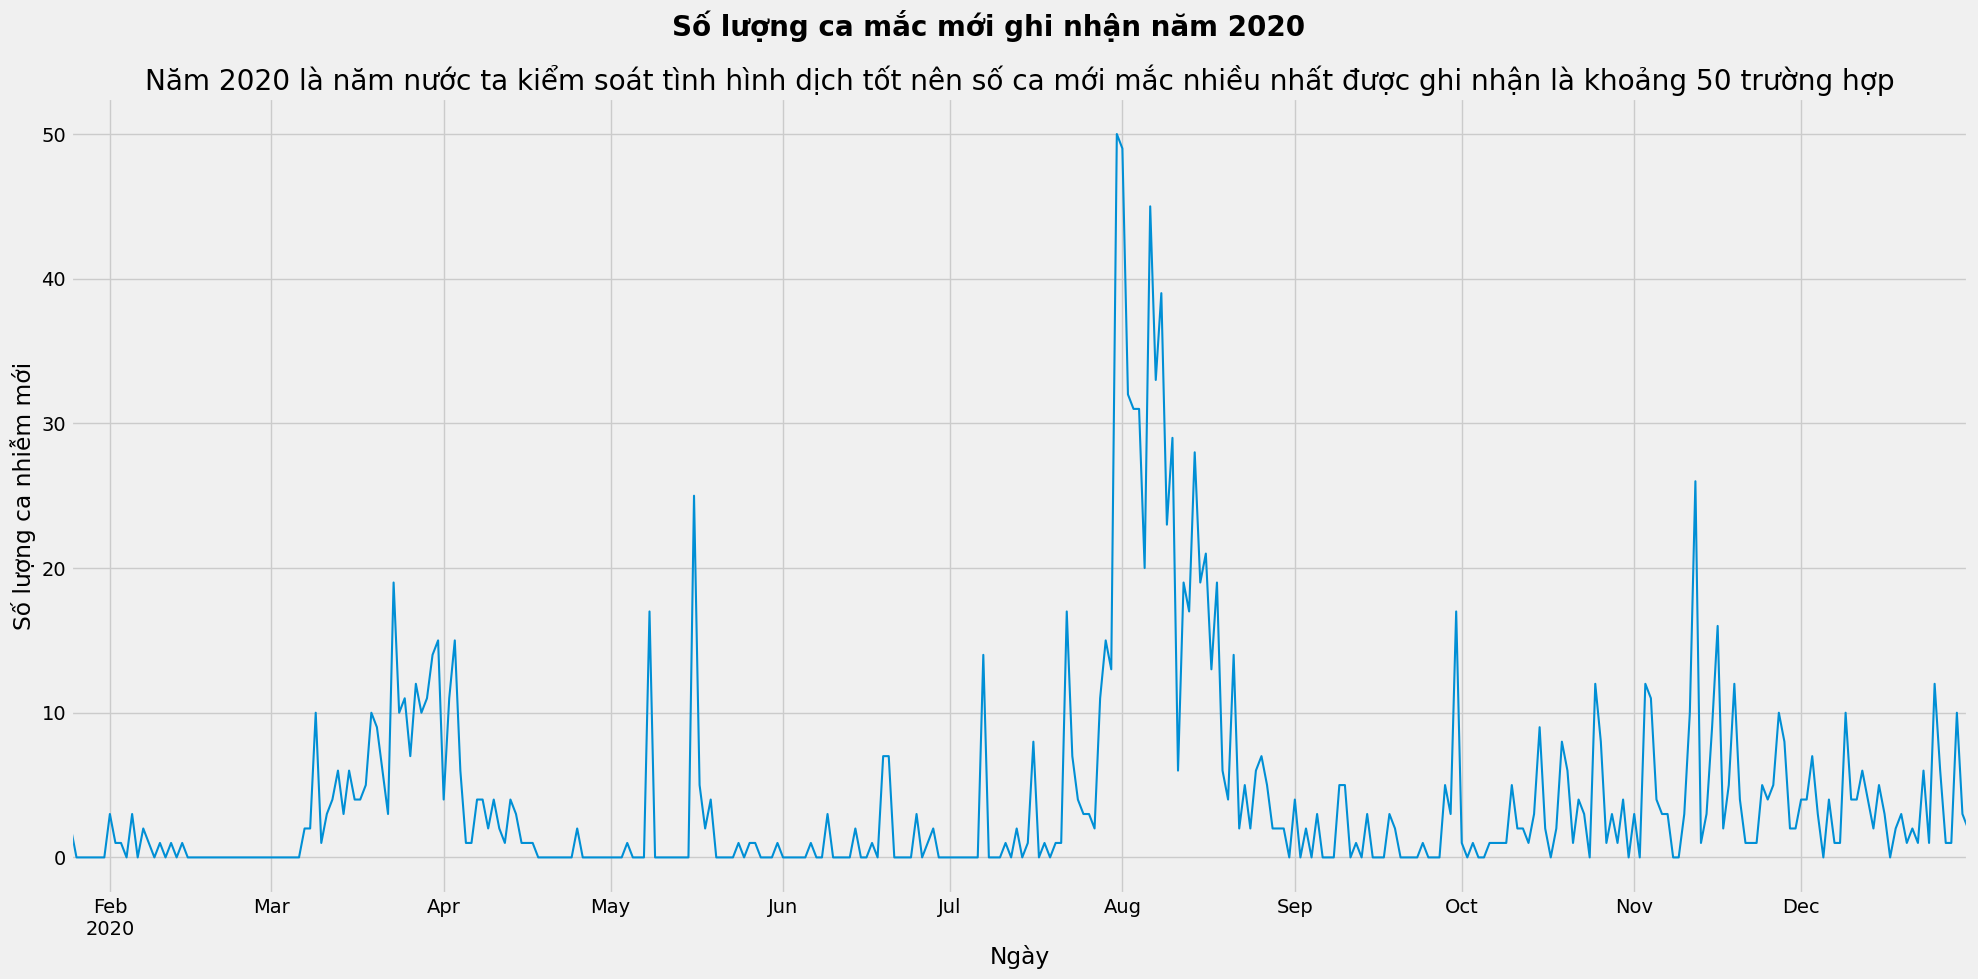

In [51]:
vn_covid_2020['new_cases'].plot(linewidth=1.5)
plt.xlabel('Ngày')
plt.ylabel('Số lượng ca nhiễm mới')
plt.suptitle("Số lượng ca mắc mới ghi nhận năm 2020", fontsize=20, weight='bold')
plt.title("Năm 2020 là năm nước ta kiểm soát tình hình dịch tốt nên số ca mới mắc nhiều nhất được ghi nhận là khoảng 50 trường hợp")
plt.tight_layout()
plt.show()

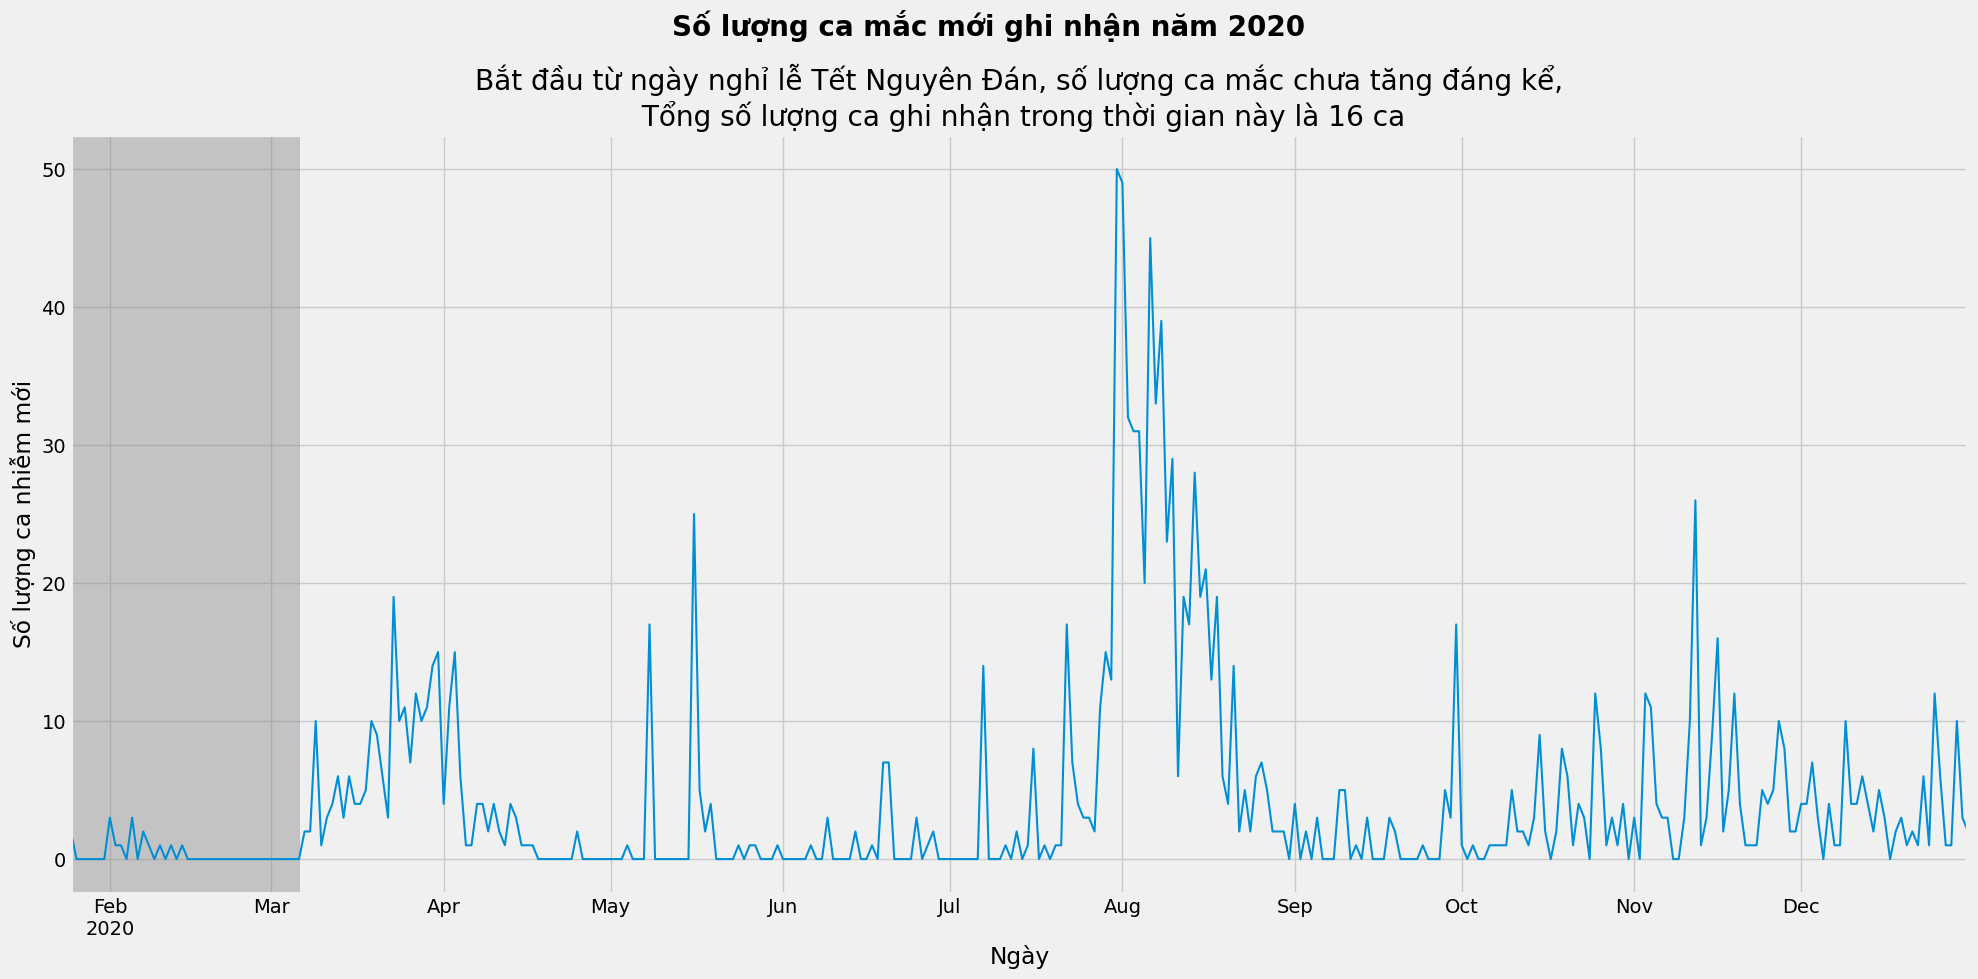

In [52]:
vn_covid_2020['new_cases'].plot(linewidth=1.5)
plt.xlabel('Ngày')
plt.ylabel('Số lượng ca nhiễm mới')
plt.suptitle("Số lượng ca mắc mới ghi nhận năm 2020", fontsize=20, weight='bold')
plt.title("Bắt đầu từ ngày nghỉ lễ Tết Nguyên Đán, số lượng ca mắc chưa tăng đáng kể,\n Tổng số lượng ca ghi nhận trong thời gian này là 16 ca")
plt.axvspan(xmin=18286, xmax=18327, ymin=0, alpha=0.4, color='gray')
plt.tight_layout()
plt.show()

#### Sự xuất hiện của ca nhiễm thứ 17 ở phố Trúc Bạch, Hà Nội

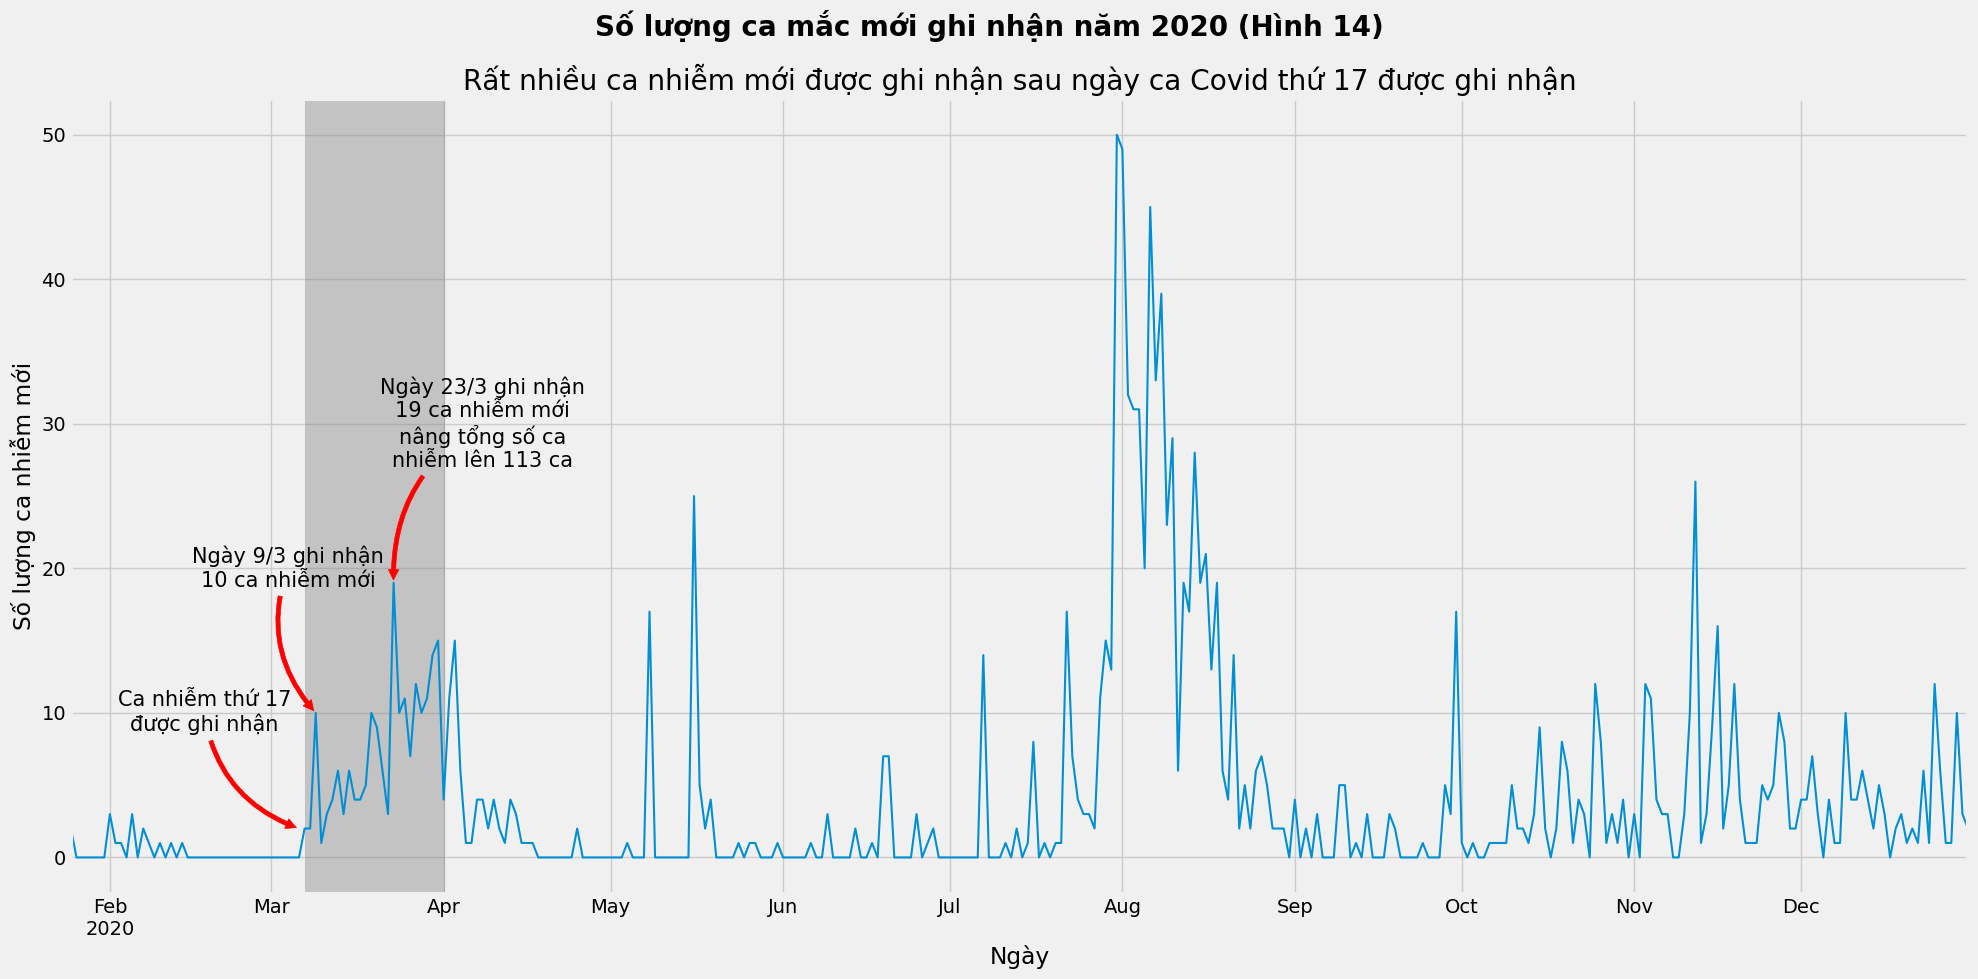

In [53]:
vn_covid_2020['new_cases'].plot(linewidth=1.5)
plt.xlabel('Ngày')
plt.ylabel('Số lượng ca nhiễm mới')
plt.suptitle("Số lượng ca mắc mới ghi nhận năm 2020 (Hình 14)", fontsize=20, weight='bold')
plt.title("Rất nhiều ca nhiễm mới được ghi nhận sau ngày ca Covid thứ 17 được ghi nhận")
plt.axvspan(xmin=18328, xmax=18353, ymin=0, alpha=0.4, color='gray')
plt.annotate("Ca nhiễm thứ 17\nđược ghi nhận",
            xy=(18327, 2), xycoords='data',
            xytext=(18310, 10), textcoords='data',
            size=15, va="center", ha="center",
            arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3,rad=0.3", color='red'))
plt.annotate("Ngày 9/3 ghi nhận\n10 ca nhiễm mới",
            xy=(18330, 10), xycoords='data',
            xytext=(18325, 20), textcoords='data',
            size=15, va="center", ha="center",
            arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3,rad=0.3", color='red'))
plt.annotate("Ngày 23/3 ghi nhận\n19 ca nhiễm mới\nnâng tổng số ca\nnhiễm lên 113 ca",
            xy=(18344, 19), xycoords='data',
            xytext=(18360, 30), textcoords='data',
            size=15, va="center", ha="center",
            arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3,rad=0.3", color='red'))
plt.tight_layout()
plt.show()

> Trong giai đoạn này, ngay sau khi ca thứ 17 được phát hiện thì lại là ngày quốc tế phụ nữ(8/3) mà trước ngày 1/4 các hoạt động cách ly vẫn chưa được thực thi rõ ràng(chỉ thị 16 được ban hành vào ngày 1/4) nên đó là lí do có nhiều trường hợp mới được ghi nhận vào trong giai đoạn này

#### Sau khi chỉ thị 16 và chỉ thị 19 được ban hành

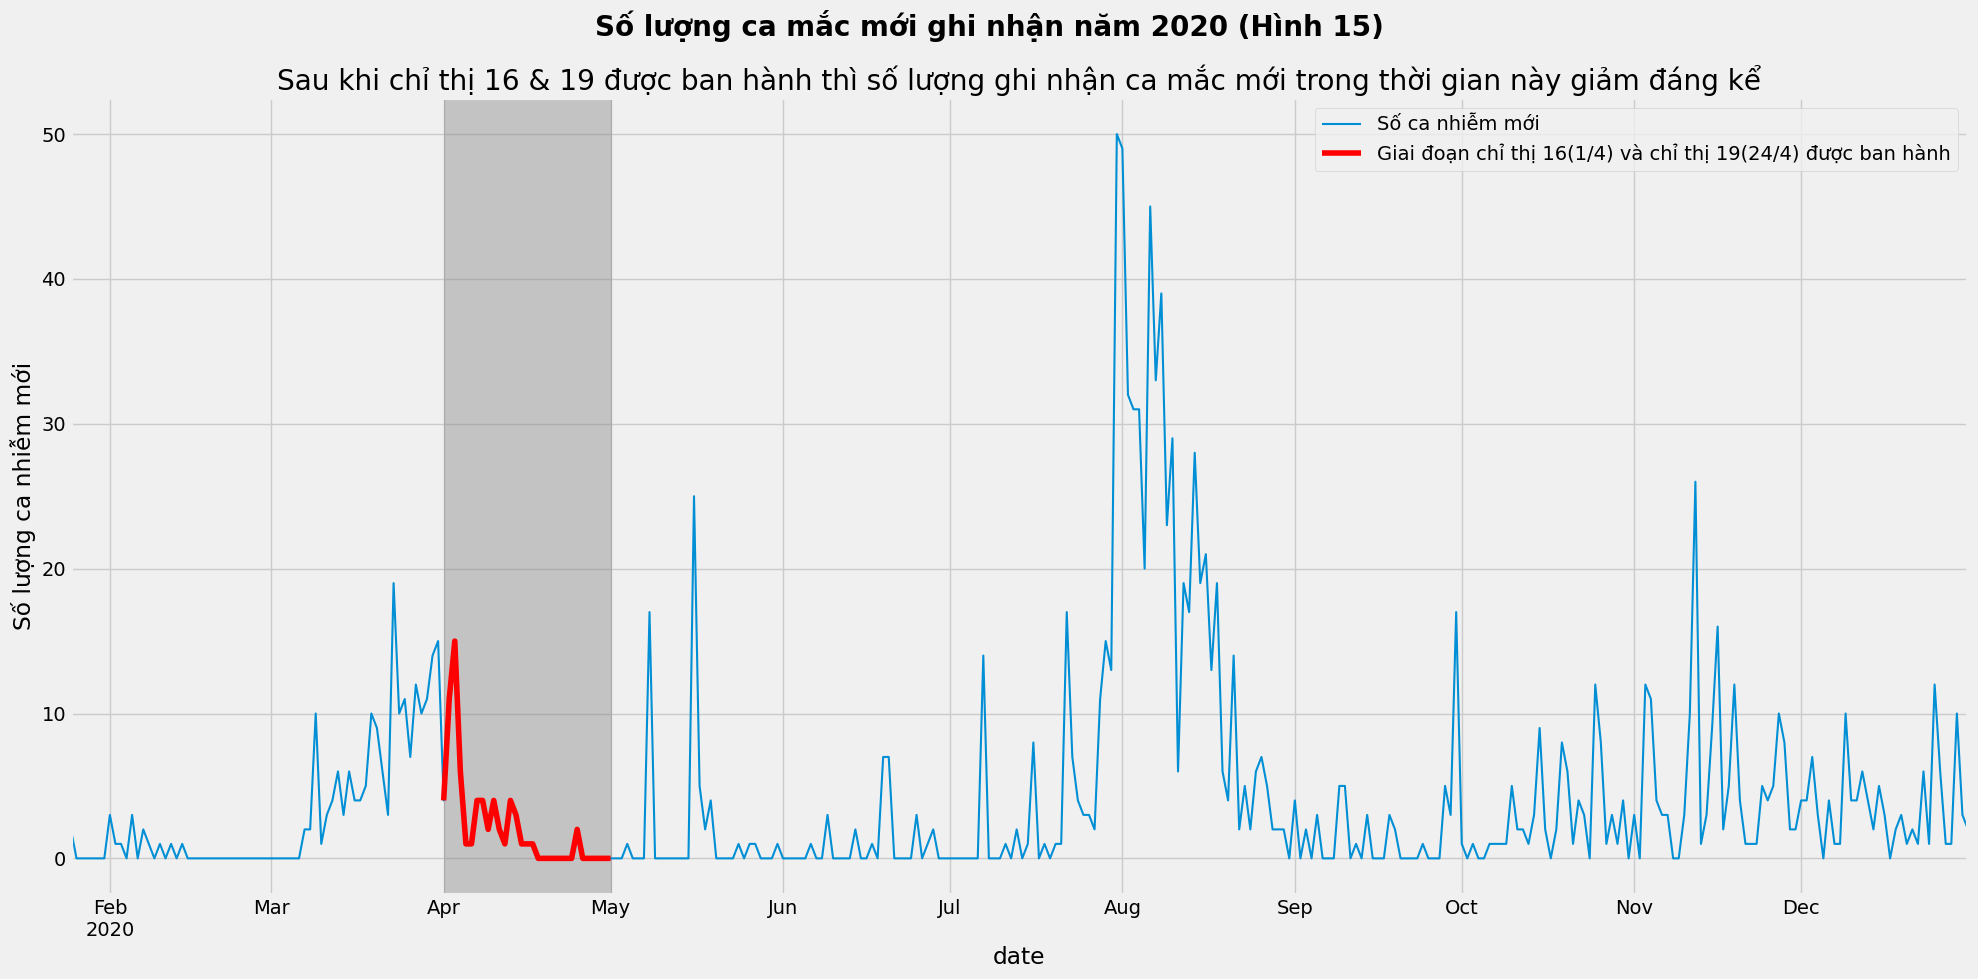

In [54]:
vn_covid_2020['new_cases'].plot(label="Số ca nhiễm mới", linewidth=1.5)
plt.xlabel('Ngày')
plt.ylabel('Số lượng ca nhiễm mới')
plt.suptitle("Số lượng ca mắc mới ghi nhận năm 2020 (Hình 15)", fontsize=20, weight='bold')
plt.title("Sau khi chỉ thị 16 & 19 được ban hành thì số lượng ghi nhận ca mắc mới trong thời gian này giảm đáng kể")
vn_covid_2020[(vn_covid_2020.index >= '2020-04-01') & (vn_covid_2020.index <= '2020-05-01')]['new_cases'].plot(color='red', label='Giai đoạn chỉ thị 16(1/4) và chỉ thị 19(24/4) được ban hành')

plt.axvspan(xmin=18353, xmax=18383, ymin=0, alpha=0.4, color='gray')

plt.legend()
plt.tight_layout()
plt.show()

#### Giai đoạn sau nghỉ lễ 30/4-1/5

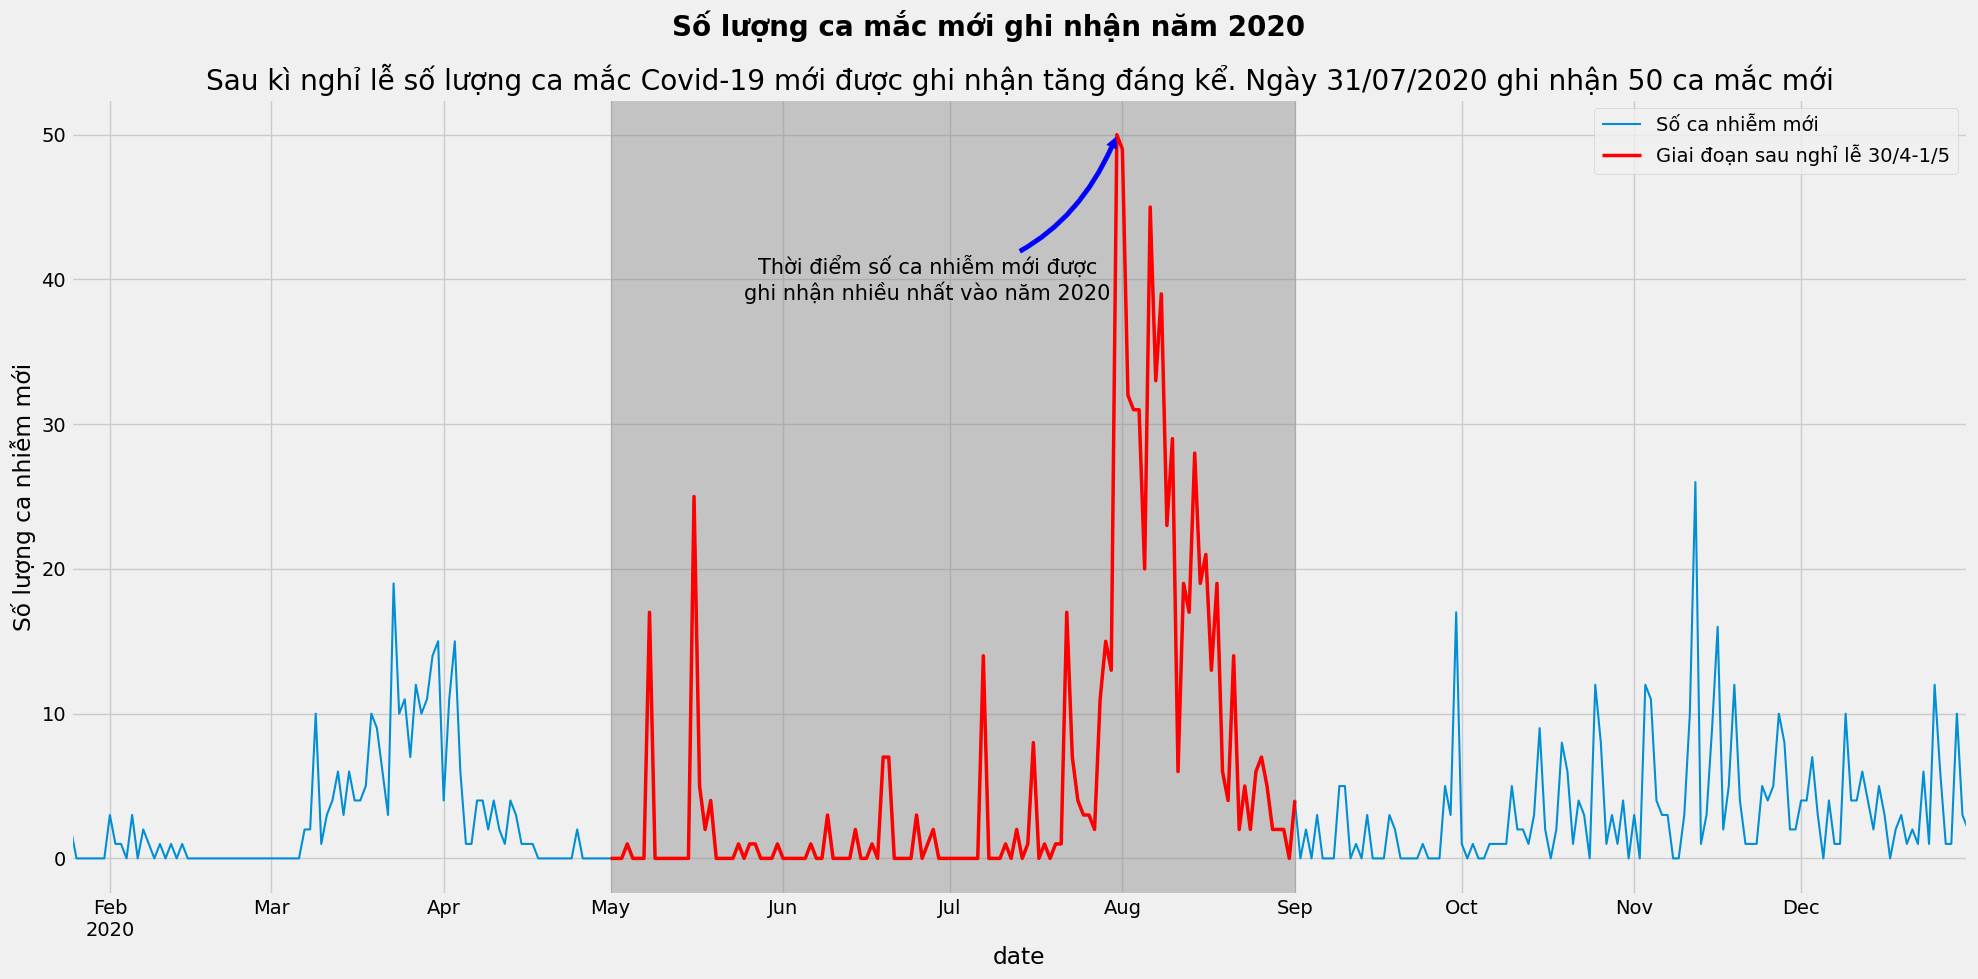

In [55]:
vn_covid_2020['new_cases'].plot(label="Số ca nhiễm mới", linewidth=1.5)
plt.xlabel('Ngày')
plt.ylabel('Số lượng ca nhiễm mới')
plt.suptitle("Số lượng ca mắc mới ghi nhận năm 2020", fontsize=20, weight='bold')
plt.title("Sau kì nghỉ lễ số lượng ca mắc Covid-19 mới được ghi nhận tăng đáng kể. Ngày 31/07/2020 ghi nhận 50 ca mắc mới")
vn_covid_2020[(vn_covid_2020.index >= '2020-05-01') & (vn_covid_2020.index <= '2020-09-01')]['new_cases'].plot(color='red', label='Giai đoạn sau nghỉ lễ 30/4-1/5', linewidth=2.5)
plt.annotate("Thời điểm số ca nhiễm mới được\nghi nhận nhiều nhất vào năm 2020",
            xy=(18474, 50), xycoords='data',
            xytext=(18440, 40), textcoords='data',
            size=15, va="center", ha="center",
            arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3,rad=0.3", color='blue'))
plt.axvspan(xmin=18383, xmax=18506, ymin=0, alpha=0.4, color='gray')

plt.legend()
plt.tight_layout()
plt.show()

In [56]:
vn_covid_2020[vn_covid_2020.index=='2020-08-31']

,location,total_cases,new_cases
date,,,
2020-08-31,Vietnam,1040,0.0


Sau giai đoạn trên (vùng bôi bỏ) hình 16 thì sẽ còn rất nhiều dịp khác (ở các dịp này người dân có thể đi chơi hoặc đi ăn liên hoan)

#### Kết luận cho năm 2020
- Sau mỗi dịp nghỉ lễ, số lượng ca Covid tăng lên đáng kể(ngày Quốc Khánh 2/9, tết Trung Thu, ...)
- Năm 2020 là năm Covid bắt đầu trở thành chủ đề hot ở nhiều khu vực trên thế giới nói chung và ở Việt Nam nói riêng nên tâm lý người dân sợ bị phải đi cách ly nên họ thường có hành động là "trốn" khai báo và chỉ đến khi trở nặng mới ra cơ sở y tế để thăm khám
- Vì tâm lý người dân sợ, nên đó là lí do mà ngay sau khi kì nghỉ lễ khoảng 7-15 ngày (thời gian ủ bệnh của Covid-19) số lượng ca mắc mới ghi nhận lại ít hơn so với các ngày bình thường, ví dụ sau nghỉ lễ 30/4-1/5 thì đến tháng 8 số ca covid mới ghi nhận nhiều 

> Từ những phân tích của từ biểu đồ đường năm 2020, liệu có phải cứ sau những dịp nghỉ lễ thì số lượng người mắc covid-19 lại tăng đáng kể hay không ?

#### Năm 2021

In [57]:
in_2021 = (vn_covid.index >= '2021-01-01') & (vn_covid.index <= '2021-12-31')

vn_covid_2021 = vn_covid[in_2021]

vn_covid_2021.head()


,location,total_cases,new_cases
date,,,
2021-01-01,Vietnam,1474,18.0
2021-01-02,Vietnam,1482,8.0
2021-01-03,Vietnam,1494,12.0
2021-01-04,Vietnam,1497,3.0
2021-01-05,Vietnam,1504,7.0


In [58]:
vn_covid_2021['new_cases']

date
2021-01-01       18.0
2021-01-02        8.0
2021-01-03       12.0
2021-01-04        3.0
2021-01-05        7.0
               ...   
2021-12-27    14872.0
2021-12-28    14440.0
2021-12-29    13889.0
2021-12-30    19868.0
2021-12-31    16515.0
Name: new_cases, Length: 365, dtype: float64

#### Năm 2022

In [59]:
in_2022 = (vn_covid.index >= '2022-01-01') & (vn_covid.index <= '2022-12-31')
vn_covid_2022 = vn_covid[in_2022]

vn_covid_2022.head()

,location,total_cases,new_cases
date,,,
2022-01-01,Vietnam,1746092,14835.0
2022-01-02,Vietnam,1763040,16948.0
2022-01-03,Vietnam,1778976,15936.0
2022-01-04,Vietnam,1800704,21728.0
2022-01-05,Vietnam,1817721,17017.0


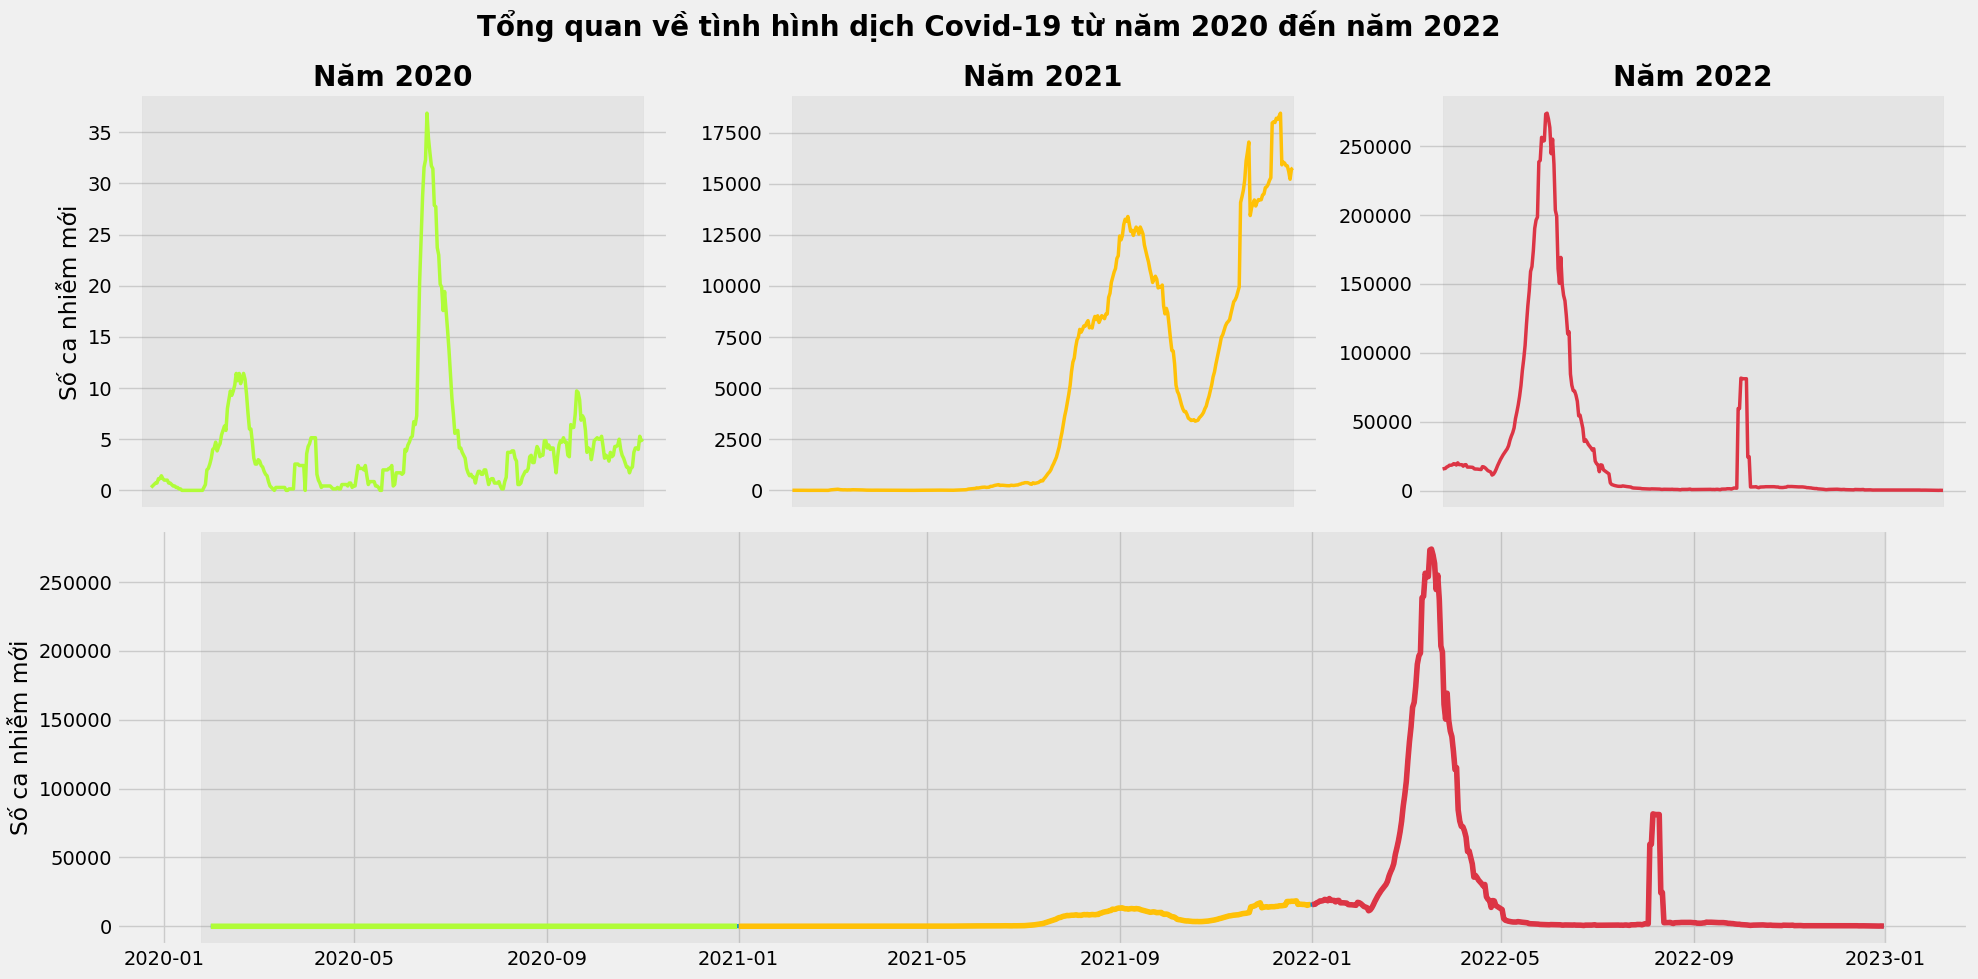

In [60]:
new_cases_all = vn_covid['new_cases'].rolling(7).mean()
new_cases_all = new_cases_all[new_cases_all.index <= '2022-12-31']
in_2020 = (new_cases_all.index >= '2020-01-01') & (new_cases_all.index <= '2020-12-31')
in_2021 = (new_cases_all.index >= '2021-01-01') & (new_cases_all.index <= '2021-12-31')
in_2022 = (new_cases_all.index >= '2022-01-01') & (new_cases_all.index <= '2022-12-31')
new_cases_2020 = new_cases_all[in_2020]
new_cases_2021 = new_cases_all[in_2021]
new_cases_2022 = new_cases_all[in_2022]
ax1 = plt.subplot(2, 3, 1)
ax1.plot(new_cases_2020.index, new_cases_2020, color='#B0FC38', linewidth=2.5)
ax1.set_xticks([])
ax1.set_title("Năm 2020", weight='bold')
ax1.set_ylabel("Số ca nhiễm mới")
ax1.axvspan(xmin=18286, xmax=18627, ymin=0, alpha=0.1, color='gray')

ax2 = plt.subplot(2, 3, 2)
ax2.plot(new_cases_2021.index, new_cases_2021, color="#ffc107", linewidth=2.5)
ax2.set_xticks([])
ax2.set_title("Năm 2021", weight='bold')
ax2.axvspan(xmin=18628, xmax=18992, ymin=0, alpha=0.1, color='gray')

ax3 = plt.subplot(2, 3, 3)
ax3.plot(new_cases_2022.index, new_cases_2022, color="#dc3545", linewidth=2.5)
ax3.set_xticks([])
ax3.set_title("Năm 2022", weight='bold')
ax3.axvspan(xmin=18993, xmax=19357, ymin=0, alpha=0.1, color='gray')

ax4 = plt.subplot(2, 1, 2)
ax4.plot(new_cases_all.index, new_cases_all, linewidth=3)
ax4.plot(new_cases_2020.index, new_cases_2020, color='#B0FC38')
ax4.plot(new_cases_2021.index, new_cases_2021, color="#ffc107")
ax4.plot(new_cases_2022.index, new_cases_2022, color="#dc3545")
ax4.set_ylabel("Số ca nhiễm mới")
plt.suptitle("Tổng quan về tình hình dịch Covid-19 từ năm 2020 đến năm 2022", fontsize=20, weight='bold')
plt.axvspan(xmin=18286, xmax=19357, ymin=0, alpha=0.1, color='gray')

plt.tight_layout()

plt.show()

## Vậy liệu dịch bệnh Covid-19 có thể trở thành một căn bệnh mang tính chu kỳ ở Việt Nam?

In [61]:
dt.datetime(2022, 1, 1) - dt.datetime(1970, 1, 1)

datetime.timedelta(days=18993)

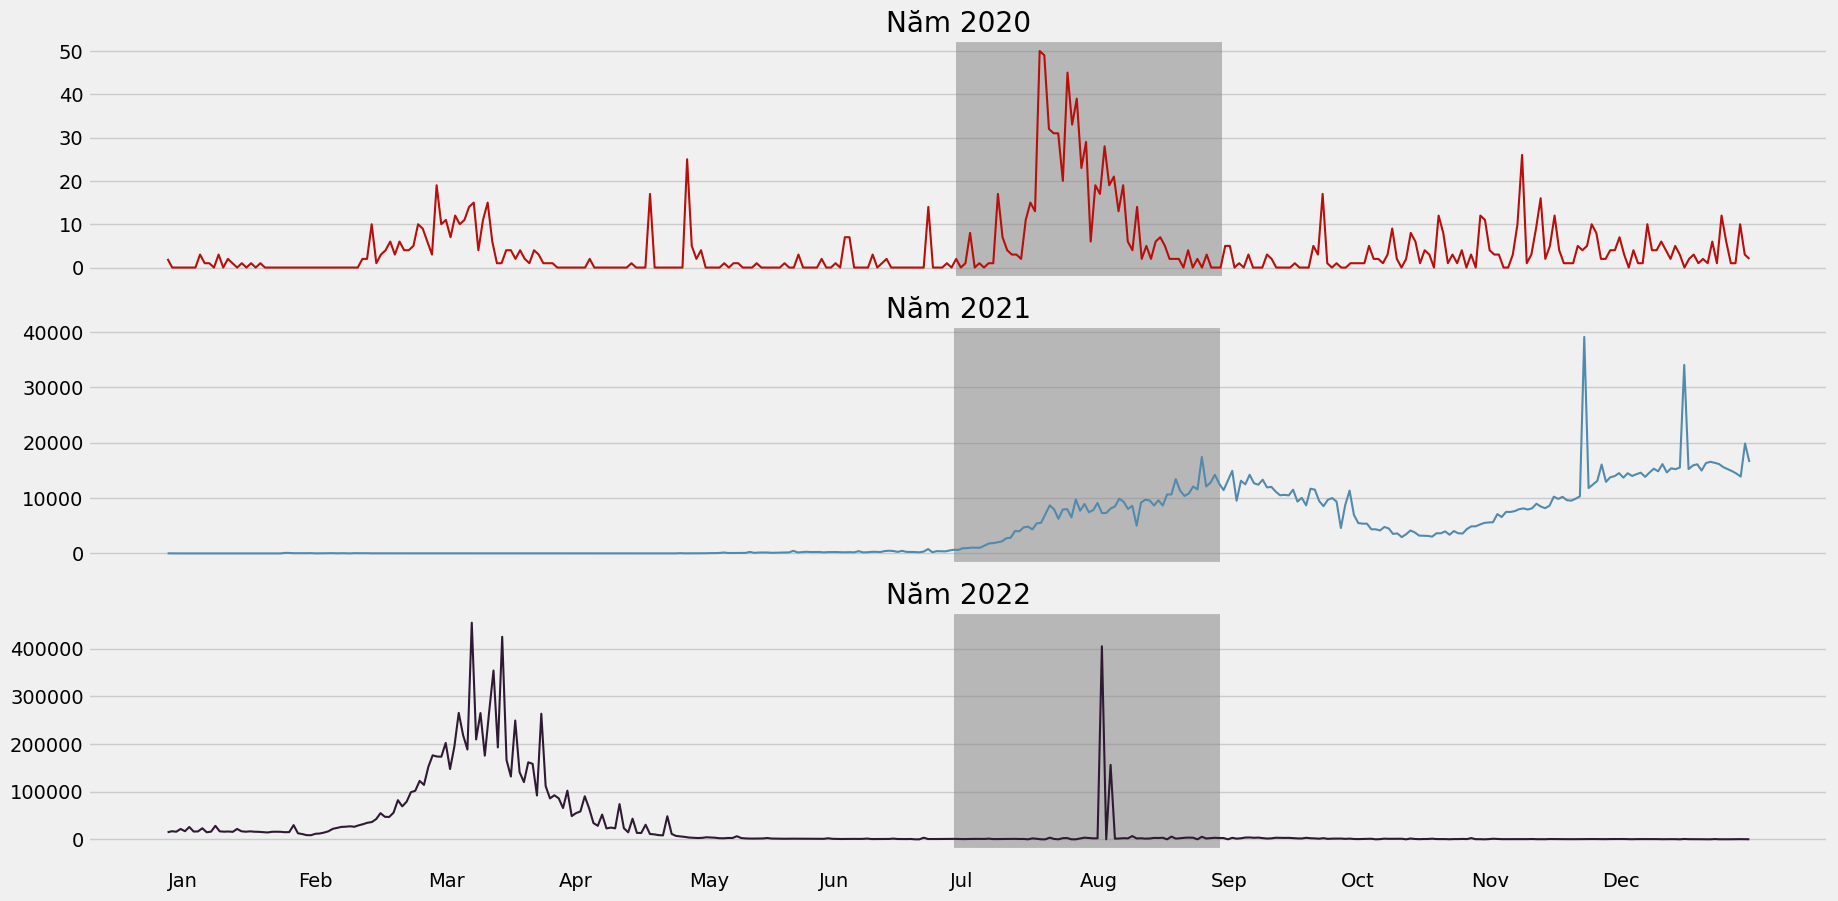

In [62]:
ax1 = plt.subplot(3, 1, 1)
ax1.plot(vn_covid_2020.index, vn_covid_2020.new_cases, color='#B90E0A', linewidth=1.5)
ax1.set_xticks([])
ax1.axvspan(xmin=18456, xmax=18513, ymin=0, alpha=0.5, color='gray')
ax1.set_title("Năm 2020")
ax2 = plt.subplot(3, 1, 2)
ax2.plot(vn_covid_2021.index, vn_covid_2021.new_cases, color='#528AAE', linewidth=1.5)
ax2.set_xticks([])
ax2.axvspan(xmin=18809, xmax=18870, ymin=0, alpha=0.5, color='gray')
ax2.set_title("Năm 2021")

ax3 = plt.subplot(3, 1, 3)
ax3.plot(vn_covid_2022.index, vn_covid_2022.new_cases, color='#301934', linewidth=1.5)
ax3.axvspan(xmin=19174, xmax=19235, ymin=0, alpha=0.5, color='gray')
ax3.set_title("Năm 2022")
ax3.set_xticks([])
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
step = 0
for m in labels:
    ax3.text(18993 + step, -1e5, m)
    step += 30
plt.show()

Qua mỗi năm chúng ta thấy rằng thời điểm bắt đầu sự biến động của dịch Covid có thể là:
- Khoảng Đông-Xuân (Tháng 12- tháng 4) 
- Khoảng Hè-Thu (Tháng 7- tháng 9) 

> Điều này cũng có nghĩa rằng dịch Covid-19 hoàn toàn có thểmang tính chu kỳ (giống như cảm cúm thường diễn ra vào mùa có độ ẩm cao), chưa thể kết luận được vì dữ liệu mới được ghi lại trong 2 năm (2020-2022).

> Vậy chúng ta có thể đưa ra dự đoán gì cho năm 2023? Liệu dịch Covid-19 có bùng phát lại theo các khoảng thời gian đã nhận định ở trên? Hay đã có thể khẳng định được Covid-19 là một căn bệnh mang tính chu kỳ hay chưa? v.v

Về dữ liệu gốc được lấy trên Kaggle, dữ liệu được ghi nhận từ đầu 2020 đến đầu 2022. Vì để cho việc đánh giá Model dự đoán và việc dự đoán cho 2023, nhóm em đã thu thập thêm dữ liệu dịch covid-19 ở Việt Năm ở năm 2022 đến nay.

In [63]:
# Tách dữ liệu covid-19 từ dữ liệu gốc
pd.read_csv('./data/asia-data.csv').query("location == 'Vietnam'")\
    .reset_index()\
    .drop('index', axis=1)\
    .to_csv('./data/vietnam-covid-data-original.csv', index=False)

## Tỉ lệ đã tiêm vaccine

Dựa trên dữ liệu mới thu thập ở Việt Nam

In [64]:
vn_data_2405 = pd.read_csv('./data/vietnam-covid-data-2405.csv')
vn_data_2405.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,VNM,Asia,Vietnam,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,308.127,32.6,7.15,4.718,6171.884,2.0,245.465,6.0,1.0,45.9,85.847,2.6,75.4,0.704,98186856.0,NaN,NaN,NaN,NaN
1,VNM,Asia,Vietnam,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,308.127,32.6,7.15,4.718,6171.884,2.0,245.465,6.0,1.0,45.9,85.847,2.6,75.4,0.704,98186856.0,NaN,NaN,NaN,NaN
2,VNM,Asia,Vietnam,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,308.127,32.6,7.15,4.718,6171.884,2.0,245.465,6.0,1.0,45.9,85.847,2.6,75.4,0.704,98186856.0,NaN,NaN,NaN,NaN
3,VNM,Asia,Vietnam,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,308.127,32.6,7.15,4.718,6171.884,2.0,245.465,6.0,1.0,45.9,85.847,2.6,75.4,0.704,98186856.0,NaN,NaN,NaN,NaN
4,VNM,Asia,Vietnam,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,308.127,32.6,7.15,4.718,6171.884,2.0,245.465,6.0,1.0,45.9,85.847,2.6,75.4,0.704,98186856.0,NaN,NaN,NaN,NaN


In [65]:
people_vaccinated = vn_data_2405.query("date=='2023-05-11'")
people_vaccinated

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
1224,VNM,Asia,Vietnam,2023-05-11,11582567.0,2507.0,2438.857,43200.0,3.0,0.714,117964.537,25.533,24.839,439.977,0.031,0.007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,266312906.0,90259259.0,85931210.0,57930065.0,NaN,6617.0,271.23,91.93,87.52,59.0,67.0,817.0,0.001,NaN,308.127,32.6,7.15,4.718,6171.884,2.0,245.465,6.0,1.0,45.9,85.847,2.6,75.4,0.704,98186856.0,NaN,NaN,NaN,NaN


In [66]:
vaccinated = people_vaccinated['people_vaccinated'].values
populations = people_vaccinated['population'].values
vaccinated, populations

(array([90259259.]), array([98186856.]))

In [67]:
percentage_of_vaccinated = np.round(vaccinated / populations, 2) * 100
percentage_of_not_vaccinated = 100 - percentage_of_vaccinated

percentage_of_vaccinated, percentage_of_not_vaccinated

(array([92.]), array([8.]))

In [68]:
df = pd.DataFrame([[percentage_of_vaccinated[0], percentage_of_not_vaccinated[0]]], columns=['Vaccinated', 'Not Vaccinated'])
df_transpose = df.T
df_transpose.reset_index(inplace=True)
df_transpose.columns = ['type', 'values']
df_transpose

,type,values
0,Vaccinated,92.0
1,Not Vaccinated,8.0


In [69]:
fig = px.pie(df_transpose, values='values', names='type',
             title='Tỉ lệ dấn số đã tiêm vaccine', hole=0.3)
fig.update_traces(pull=[0, 0.2])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=px.colors.qualitative.G10, line=dict(color='#000000', width=2)))
fig.update_layout(
    title={
        'text': "Tỉ lệ người đã tiêm vaccine và chưa tiêm vaccine",
        'y': 0.3,
        'x': 0.15,
        'xanchor': 'center',
        'yanchor': 'top', })
fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))
fig.show()